# The contrast-dependence of spatial frequency tuning
## Thesis chapter 1/publication

Here, we'll organize (better than has been organized in the predecesor notebooks __{analysis_ch1, analysis_ch1_suppl, descrAnalysisV1-allExps, V1_clustering, and descrAnalysisLGN]}__ the analysis for chapter 1 of my thesis. The primary intention behind re-doing this notebook (_again_) is that per a meeting in April 2022, Tony and Eero suggested we write this chapter as a paper fit for publication.

In particular, writing this chapter as a paper necessitates re-doing some of the analyses from Sach Sokol's thesis (specifically, his 3rd chapter).

Last access (y.m.d): 22.09.12   
Last update (y.m.d): 22.09.12   

In [1978]:
import helper_fcns as hf
import plot_sf_figs as psf
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='once')

import os, pdb
import scipy.stats as ss
import scipy.odr.odrpack as odrpack
from scipy.stats.mstats import gmean
from scipy.stats import ks_2samp, kstest, linregress
import itertools
import autoreload
from IPython.core.display import display, HTML, Image

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.style.use('https://raw.githubusercontent.com/paul-levy/SF_diversity/master/paul_plt_style.mplstyle');
import matplotlib.cm as cm
import matplotlib.backends.backend_pdf as pltSave
from matplotlib.ticker import FuncFormatter
%matplotlib inline
# plt.style.use('https://raw.githubusercontent.com/paul-levy/SF_diversity/master/paul_plt_style.mplstyle');

base_dir = os.getcwd() + '/';

# what's the save name for this analysis?
saveName = 'figures/reports/ch01_sfTuning_contrast/'; # for one save name for all figures
save_loc = base_dir + saveName;

In [1962]:
# Before any plotting, fix plotting paramaters
# plt.style.use('https://raw.githubusercontent.com/paul-levy/SF_diversity/master/paul_plt_style.mplstyle');
from matplotlib import rcParams

tex_width = 469; # per \layout in Overleaf on document
sns_offset = 2;

rcParams.update(mpl.rcParamsDefault)

fontsz = 12;
tick_scalar = 1.5;

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : fontsz,
          'font.family': 'lmodern',
           'font.style': 'italic'}
plt.rcParams.update(params)

# rcParams['lines.linewidth'] = 2.5;
rcParams['lines.markeredgewidth'] = 0; # no edge, since weird tings happen then
# rcParams['axes.linewidth'] = 2; # was 1.5
# rcParams['lines.markersize'] = 5;

tick_adj = ['xtick.major.size', 'xtick.minor.size', 'ytick.major.size', 'ytick.minor.size']
for adj in tick_adj:
    rcParams[adj] = rcParams[adj] * tick_scalar;

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  app.launch_new_instance()


# 1.1 LGN

### 1.1.00 - Example tuning curves for M, P neurons

I'll aim for a 4-panel figure, where we have 2 examples each from M & P - maybe three with varying degrees of shifts, and one with no shift (or 2+2).

In [2634]:
autoreload.reload(psf);

/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/plot_sf_figs.py:283: DeprecationWarning: invalid escape sequence \%
  ax[i,j].plot(sfs_plot[plt_resp>minToPlot], plt_resp[plt_resp>minToPlot], color=col, clip_on=True, label='%s\%%' % (str(int(100*np.round(curr_con, 2)))));


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);


phaseAdvanceFitsHPC_220531


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1465: UserWarning: this condition is not valid
  warnings.warn('this condition is not valid');
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Doing the work, now


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1246: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  all_proj = [];
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/plot_sf_figs.py:285: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i,j].set_xlim((0.5*min(all_sfs), 1.2*max(all_sfs)));
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in al

phaseAdvanceFitsHPC_220531


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1465: UserWarning: this condition is not valid
  warnings.warn('this condition is not valid');
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Doing the work, now


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1246: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  all_proj = [];
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/plot_sf_figs.py:285: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i,j].set_xlim((0.5*min(all_sfs), 1.2*max(all_sfs)));


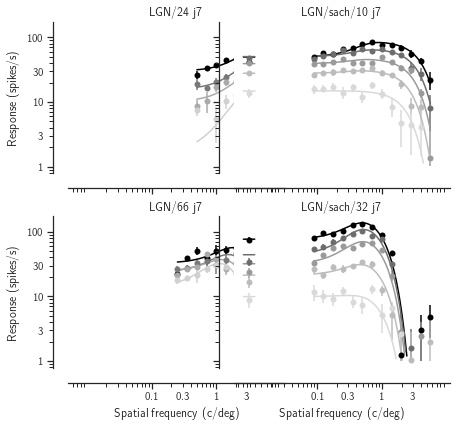

In [2639]:
common_axes = True;
f,yax=plt.subplots(2,2, figsize=hf.set_size(tex_width, extra_height=1.5), sharex=common_axes, sharey=common_axes)

joint = 7; # joint=2 means surround radius is fixed across contrast; 7 is slope model; 0 is sep. fits
# date = '220702vE' if joint==7 else '220609';
# date_sach = '220730vE' if joint==7 else date;
date = '220810vEs'

despine=15

# incl_legend=True
# subplot_title=True
incl_legend=False
subplot_title=False

incl_zfreq = True
# incl_zfreq = False

### let's have the two Sach examples in the same column since they'll take up more room
# - first, two parvos
psf.plot_sfs(yax, 0, 0, 24, 'LGN/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=1, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, incl_zfreq=incl_zfreq, despine_offset=despine)
psf.plot_sfs(yax, 0, 1, 10, 'LGN/sach/', descrBase='descrFitsHPC_s%s' % date_sach, subset_cons=[2,2], descrMod=1, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, incl_zfreq=incl_zfreq, despine_offset=despine)
# - then, two magnos
psf.plot_sfs(yax, 1, 0, 66, 'LGN/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=1, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, incl_zfreq=incl_zfreq, despine_offset=despine)
psf.plot_sfs(yax, 1, 1, 32, 'LGN/sach/', descrBase='descrFitsHPC_s%s' % date_sach, subset_cons=[2,2], descrMod=1, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, incl_zfreq=incl_zfreq, despine_offset=despine)

if incl_legend or subplot_title:
    f.tight_layout(w_pad=-6);
else:
    f.tight_layout(w_pad=-2, h_pad=1);
#     f.subplots_adjust(wspace=-0.025)

saveName = "/01_01_00_tuning_jt%d%s%s%s%s.pdf" % (joint, '_lgnd' if incl_legend else '', '_ttl' if subplot_title else '', '_common' if common_axes else '', '_zfreq' if incl_zfreq else '')
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight') # only one figure here...
pdfSv.close()

### 1.1.01 - Scaled vs. separate Difference-of-Gaussians (DoG) 

The first key analysis in Sach's thesis is showing that spatial frequency tuning is contrast dependent. Using a $\chi^2$ analysis, he shows that despite using extra parameters, a separate-per-contrast Difference-of-Gaussians (DoG) model outperforms a scaled DoG model. In the scaled model, the shapes and relative magnitudes of the gaussians are fixed, and the resultant curve can only be shifted vertically (i.e. changing response magnitude).

As of 22.04.20, we will not replicate this analysis, taking it as a well-justified in the literature.

### 1.1.02 - Determining which DoG parameters matter most

In section 3.3.4 (_Which DoG parameters can account for contrast-dependent tuning?_), Sach asks which of the DoG parameters are most needed to be adjustable across contrast. Using the more common approaches of the time (thesis defended in 2009), he used a $\chi^2$ analysis which compared the loss of each model while taking into account the number of free parameters. Since computational resources and accessibility have greatly improved in the interim period, we'll instead use cross-validation to compare the different models.

#### The models
- $\Delta$_volume ratio_ (2*$n_{con}$ + 2 free parameters) - center and surround radii are fixed
- $\Delta$_center radius_ (2*$n_{con}$ + 2 free parameters) - surround radius and relative surround gain are fixed
    - Note that the surround radius is fixed in absolute terms
- $\Delta$_surround radius_ (2*$n_{con}$ + 2 free parameters) - center radius and relative surround gain are fixed
- $\Delta$_center-surround_ (3*$n_{con}$ + 1 free parameters) - relative surround gain is fixed

And for thorough comparison, we also include the model with which most prior analysis was done

- $\Delta$_center radius + vol_ (3*$n_{con}$ + 1 free parameters) - relative surround radius is fixed
    - This model differs from $\Delta$_center radius_ in that the surround radius is fixed in relative terms to the center radius at contrast. Further, the relative Gaussian volumes are allowed to changed (since the relative surround gain term is free at each contrast)
    
and, as of 22.06.07, a more succinct version of the above model in which the center radius is determined by a slope, rather than fit per-contrast:

- $\Delta$_center radius slope + vol_ (2*$n_{con}$ + 3 free parameters) - relative surround radius is fixed
    - This model differs from $\Delta$_center radius + vol_ in that the center radius is determined by a model in which we assume a power law relationship between log contrast and log center radius, i.e. $$r(c) = x^{a + b*log_x(c)}$$ with x=10. Thus, the $n_{con}$ parameters giving the center radii become just 2 (intercept, $a$; and slope, $b$)

#### Schematic, in the style of Sach figure 3-5

##### But first, just showing the space -- fourier connection for DoG

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


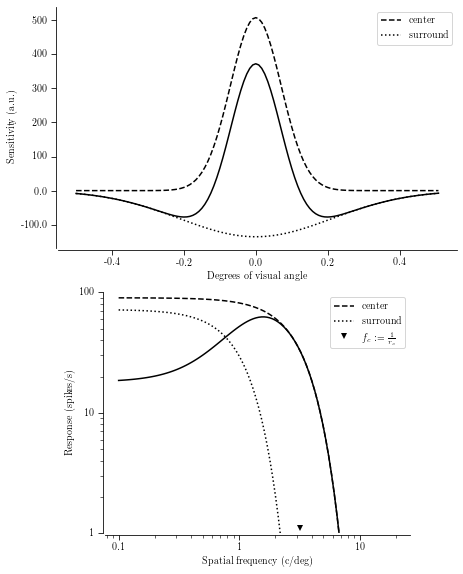

In [930]:
nrow, ncol = 2,1
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1));

# DOG params - same as below figure...
ref_params = [90, 0.1, 0.8, 3]
# sf values
vals = np.geomspace(0.1, 20, 100);

# first, in space -- from hf.parker_hawken (space subsection)
spaceRange = 0.5; nSteps=60
xSamps = np.arange(-spaceRange, spaceRange+1.0/nSteps, 0.5/nSteps); # go in steps of half an arcminute                                                                       
# As described in the appendix of Hawken & Parker, 1987, it is necessary to divide out sqrt(pi)*radius from all gains in the spatial domain                                  
# -- this is necessary when we simply use a constant (independent of pi, radius, or any other factors) when fitting the frequency response                                   
kc = ref_params[0]
xc = ref_params[1];
ks = kc*ref_params[2];
xs = xc*ref_params[3];

ctr = kc*np.power(np.sqrt(np.pi)*xc, -1)*np.exp(-np.square((xSamps+0)/xc))
surr = -ks*np.power(np.sqrt(np.pi)*xs, -1)*np.exp(-np.square((xSamps+0)/xs))
dog1 = ctr+surr

ax[0].plot(xSamps, dog1, 'k-')
ax[0].plot(xSamps, ctr, 'k--', label='center')
ax[0].plot(xSamps, surr, 'k:', label='surround')
ax[0].set_xlabel('Degrees of visual angle')
ax[0].set_ylabel('Sensitivity (a.u.)')
ax[0].legend();

# then, in fourier
sfs = np.geomspace(0.3, 10,60)
dog1 = hf.DoGsach(*ref_params, stim_sf=vals)[0]
ctr_only = np.copy(ref_params);
ctr_only[2]=0;
ctr = hf.DoGsach(*ctr_only, stim_sf=vals)[0]
surr_only = np.copy(ref_params);
surr_only[0]=surr_only[0]*surr_only[2];
surr_only[1]=surr_only[1]*surr_only[3];
surr_only[2]=0;
surr = hf.DoGsach(*surr_only, stim_sf=vals)[0]

ax[1].loglog(vals, dog1, 'k-', )
ax[1].loglog(vals, ctr, 'k--', label='center')
ax[1].loglog(vals, surr, 'k:', label='surround')
# and plot char. freq.
cf = hf.dog_charFreq(ref_params, DoGmodel=1)
ax[1].loglog(cf, 1.1, 'v', color='k', label=r'$f_c:=\frac{1}{r_c}$')
# then set axes, labels
ax[1].set_ylim([1, 100])
ax[1].set_xlabel('Spatial frequency (c/deg)')
ax[1].set_ylabel('Response (spikes/s)')
ax[1].set_aspect('equal')
ax[1].legend();

for i in range(2):
    for jj, axis in enumerate([ax[i].xaxis, ax[i].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                     

f.tight_layout()
sns.despine(offset=sns_offset)

saveName = "/01_01_02_dog_space_fourier.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()

In [1819]:
autoreload.reload(hf);

/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:3665: DeprecationWarning: invalid escape sequence \d
  expInd = get_exp_ind(data_loc, expName)[0];


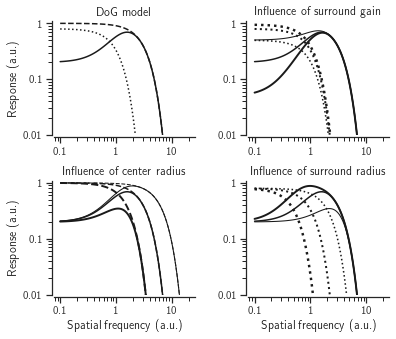

In [2528]:
# DOG params
ref_params = [90, 0.1, 0.8, 3]
# sf values
vals = np.geomspace(0.1, 20, 100);

with_legend = False
del_linewidth = True;
show_title = False;

normed = True

nrow, ncol = 2,2
# f, ax = plt.subplots(nrow, ncol, figsize=(nrow*8,ncol*6))
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, extra_height=1.25));#figsize=(nrow*8,ncol*6))
# f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1.3));#figsize=(nrow*8,ncol*6))

### all log-log
saveName = "/01_01_02_sach_simulation%s%s%s%s_220902.pdf" % ('_dLW' if del_linewidth else '', '_lgnd' if with_legend else '', '_ttl' if show_title else '', '_norm' if normed else '');
if not with_legend:
    g = open(save_loc + saveName.replace('.pdf', '.txt'), 'w')
    g.write('DoG parameters: %s\n' % f'{" ".join(format(c, ".2f") for c in ref_params)}')

# first, just a simple DoG
only_ctr = np.copy(ref_params);
only_ctr[2]=0;

to_norm = np.nanmax(hf.DoGsach(*only_ctr, stim_sf=vals)[0]) if normed else 1;

ax[0,0].plot(vals, hf.DoGsach(*ref_params, stim_sf=vals)[0]/to_norm, 'k-')
ax[0,0].plot(vals, hf.DoGsach(*only_ctr, stim_sf=vals)[0]/to_norm, 'k--')
only_sur = np.copy(ref_params);
only_sur[0] = ref_params[0] * ref_params[2];
only_sur[1] = ref_params[1] * ref_params[3];
only_sur[2] = 0;
ax[0,0].plot(vals, hf.DoGsach(*only_sur, stim_sf=vals)[0]/to_norm, 'k:')
ax[0,0].set_title('DoG model')

# then, vol difference
vols = [0.5,0.8,0.95]
if not with_legend:
    g.write('\tvolume ratio: %s\n' % f'{" ".join(format(c, ".2f") for c in vols)}')

# vols = [0.2,0.4,0.6,0.8,0.9,0.95]
# ax[0,1].plot(vals, hf.DoGsach(*only_sur, stim_sf=vals)[0], 'k:')
# ax[0,1].plot(vals, hf.DoGsach(*only_ctr, stim_sf=vals)[0], 'k--')
for ii,v in enumerate(vols):
    prms_curr = np.copy(ref_params);
    prms_curr[2] = v;
    
    # now, change the linewidth to be a fraction of the default
#     curr_lw = v/np.median(vols) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k-', label='%.2f' % v, linewidth=curr_lw)#, alpha=v)
    if with_legend:
        ax[0,1].legend(fontsize='small')
    # pretend the surround is the center, and plot just that
    prms_curr[0] = prms_curr[0]*prms_curr[2];
    prms_curr[1] = prms_curr[1]*prms_curr[3];
    prms_curr[2] = 0;
    ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
ax[0,1].set_title('Influence of surround gain')

# then, rc
rcs = [0.05,0.1,0.2]
if not with_legend:
    g.write('\tcenter radii: %s\n' % f'{" ".join(format(c, ".2f") for c in rcs)}')

# rcs = [0.03, 0.05, 0.07,0.1,0.15,0.2]
# ax[1,0].plot(vals, hf.DoGsach(*only_sur, stim_sf=vals)[0], 'k:')
# ax[1,0].plot(vals, hf.DoGsach(*only_ctr, stim_sf=vals)[0], 'k--')
for ii,r in enumerate(rcs):
    prms_curr = np.copy(ref_params);
    prms_curr[1] = r;
    # per T+E, 22.09.01 -- make surround radius constant in absolute, not relative terms...
    # --- so, to get the same absolute radius, divide the original surr radius by the ratio of new:old c.r.
    prms_curr[3] = ref_params[3] / (r/ref_params[1])
    alph = 1 - r/rcs[-1] + 0.1
    
    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,0].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
    if with_legend:
        ax[1,0].legend(fontsize='small')
    
    # and plot char. freq.
#     cf = hf.dog_charFreq(prms_curr, DoGmodel=1)
#     ax[1,0].loglog(cf, 1.1, 'v', color='k', alpha=r/rcs[-1])
    
    prms_curr[2] = 0; # shut off the suround, and plot only the center...
    ax[1,0].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k--', linewidth=curr_lw)
ax[1,0].set_title('Influence of center radius')

# then, rs
rss = [1.5,3,6]
# rss = [1.25, 2, 2.5, 3, 4, 6]
if not with_legend:
    g.write('\tsurround radii: %s\n' % f'{" ".join(format(c, ".2f") for c in rss)}')

for ii,r in enumerate(rss):
    prms_curr = np.copy(ref_params);
    prms_curr[3] = r;
    alph = 1 - r/rss[-1] + 0.1
       
    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
#     curr_lw = np.sqrt(r/np.median(rss)) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k-', label='%.2f' % r, linewidth=curr_lw)#, alpha=alph)

    # pretend the surround is the center, and plot just that
    prms_curr[0] = prms_curr[0]*prms_curr[2];
    prms_curr[1] = prms_curr[1]*prms_curr[3];
    prms_curr[2] = 0;
    ax[1,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0]/to_norm, 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
    if with_legend:
        ax[1,1].legend(fontsize='small')
        
ax[1,1].set_title('Influence of surround radius')

for i,j in itertools.product(range(2),range(2)):
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylim([.01, 1.1]) if normed else ax[i,j].set_ylim([1, 100])
    if i == 1:
        xlbl = '(a.u.)' if normed else '(c/deg)'
        ax[i,j].set_xlabel('Spatial frequency %s' % xlbl)
    if j == 0:
        ylbl = '(a.u.)' if normed else '(spikes/s)'
        ax[i,j].set_ylabel('Response %s' % ylbl)
    ax[i,j].set_aspect('equal')

    for jj, axis in enumerate([ax[i,j].xaxis, ax[i,j].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x if x>=0.1 else '%.2f' % x)) # this will make everything in non-scientific notation!                                                                                                                     
    
sns.despine(offset=sns_offset)
if show_title:
    f.suptitle(r'Influence of DoG parameters')

if not with_legend:
    g.close();
    
f.subplots_adjust(wspace=0.15, hspace=0.4);
# f.tight_layout()

full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f, bbox_inches='tight') # only one figure here...
# plt.savefig(full_save + saveName.replace('.pdf', '.svg'), format="svg")
pdfSv.close()


#### Cross-validation

In cross-validation, we partition the data into training and test, optimizing the model jointly across all contrasts based only on the training data. We then evaluate the model on the heldout (i.e. test) portion of the data, and assess the loss function. If model X has better training performance than model Y but worse test performance, then we can say that model X is simply overfitting the data. For example, we know that a well-parameterized model with more free parameters will outperform one with fewer parameters; however, how those models perform on heldout data is a better measure of the model's explanatory capabilities.

NOTE: Rather than cross-validation by trial, as described above, for the paper/chapter, we will perform cross-validation by holding out on conditions, i.e. leave-one-out cross-validation. Thus, out of N conditions in the SF x CON stimulus matrix, we'll sequentially leave out some condition (sf_i, con_j), fit the model(s), and then evaluate the loss on the heldout condition.


#### Model performance (all data)
First, we'll compare the model performance when fitting to all of the data.

In [1906]:
# Specify which data to load
phAdj = 1;
# phAdj = 0;

expDirs = ['LGN', 'LGN/sach/'];
joints = [0,2,5,7]
nFreeParams = [4,3,2,2]
names = ['free', r'$r_c, vol$', r'$r_c$', r'$r_c (slope), vol$'];

nlls_all = [];

for expDir in expDirs:

    isSach = 1 if 'sach' in expDir else 0;
    expDir_str = 'sach' if isSach else expDir
    if phAdj:
        date = '220609'
    #     date = '220513a' if isSach else '220512'
    else:
        date = '220609'
    #     date = '220510' if isSach else '220519'


    # joints = [0,2,4,6,7]
    # nFreeParams = [4,3,2,3,2]
    # names = ['free', 'ctr. r. + vol', 'ctr. r', 'ctr-surr', 'ctr.r. slope, surrRad'];

    # joints = [2,7]#,8];
    # nFreeParams = [3,2]#,2]; # how many free params per condition?
    # joints = [2,3,4,5,6];
    # nFreeParams = [3,2,2,2,3]; # how many free params per condition?
    # names = ['ctr. r. + vol', 'ctr.r. slope, surrRad'];
    # names = ['ctr. r. + vol', 'vol. ratio', 'surr. r', 'ctr. r', 'ctr-surr'];
    # if len(joints)>5:
    #     names = ['ctr. r. + vol', 'vol. ratio', 'surr. r', 'ctr. r', 'ctr. r. slope, surrRad', 'ctr-surr'];
    #     names.append('ctr. r. slope, surrGain');    

    isHPC = 1;
    loss_type = 2;
    dog_model = 1;
    if isSach:
        dogName = 'descrFits%s_s%s' % ('HPC' if isHPC else '', date);
    else:
        dogName = 'descrFits%s_%s' % ('HPC' if isHPC else '', date);
    # NOTE: Yes, the naming convention for surr/center radius models are reversed from the fit names
    # --- that's because here (and in Sach's thesis) we model the name by what does shift
    # --- in my naming convention, we name it after what does NOT shift with contrast
    nMods = len(joints);
    ref_ind = 0; # in the index of the joints that we'll use as the reference
    param_color = ['', '', 'r', 'k', 'b']; # what color based on # params per condition
    param_alpha = [0, 0, [0,0,0,0.33], [0,0,0,0.66], [0,0,0,1]]; # what color based on # params per condition

    ref_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(dog_model), joint=joints[ref_ind], phAdj=phAdj)));
    nCells = len(ref_mod.keys());

    # Now, organize all of the loss values - raw and normalized by the reference models
    raw_ind = 0;
    norm_ind = 1;
    nlls_curr = np.nan * np.zeros((nCells, nMods, 2)); # end is [raw_ind, norm_ind]

    for i,j in enumerate(joints):
        curr_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(dog_model), joint=j, phAdj=phAdj)));
        if curr_mod == []:
            continue;
        if isSach:
            nlls_curr[:, i, 0] = np.array([curr_mod[x]['totalNLL'] for x in range(nCells)]) if j>0 else np.array([np.nansum(curr_mod[x]['NLL']) for x in range(nCells)]);
        else:
            nlls_curr[:, i, 0] = np.array([curr_mod[x]['totalNLL'][0] for x in range(nCells)]) if j>0 else np.array([np.nansum(curr_mod[x]['NLL'][0]) for x in range(nCells)]);

    # then normalize, too:
    nlls_curr[:,:,1] = np.divide(nlls_curr[:,:,0], np.repeat(np.transpose([nlls_curr[:,ref_ind,0]]), nMods, axis=1))
    
    # and add to overall list...
    if nlls_all == []:
        nlls_all = nlls_curr;
    else:
        nlls_all = np.vstack((nlls_all, nlls_curr));

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Now plot the distributions of losses across all cells (again, this is fitting to all data)

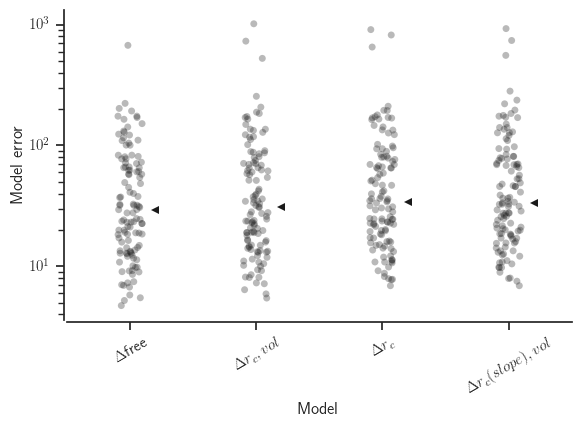

In [1907]:
use_norm = 0;
upper_bound = 2 if use_norm else np.Inf;

monochrome = True; # all black? or not?
show_title = False;
alph=0.3;

f = plt.figure(figsize=hf.set_size(tex_width))

# for ind in range(nMods):
    
#     sns.swarmplot(y=nlls_all[:,ind,use_norm], x=[ind]);
#     viol = plt.violinplot(dataset=nlls_all[:,ind,use_norm], positions=[ind], showextrema=False, widths=0.7);

#     # make all the violin stuff black and transparent
#     for vp in viol['bodies']:
#         vp.set_color(param_color[nFreeParams[ind]])
#         vp.set_alpha(0.2);

nCells = nlls_all.shape[0]
if monochrome:
    [plt.plot(i+0.2, np.nanmedian(nlls_all[:,i,use_norm]), '<', color='k') for i in range(nMods)]
    sns.stripplot(x=np.tile(np.arange(nMods), nCells), y=hf.flatten_list(np.clip(nlls_all[:,:,use_norm], None, upper_bound)), 
                  color='k', alpha=alph);
else:
    [plt.plot(i+0.2, np.nanmedian(nlls_all[:,i,use_norm]), '<') for i in range(nMods)]
    sns.stripplot(x=np.tile(np.arange(nMods), nCells), y=hf.flatten_list(np.clip(nlls_all[:,:,use_norm], None, upper_bound)));
sns.despine(offset=sns_offset)

if use_norm:
    plt.axhline(1, color='k', linestyle='--', alpha=0.3)
else:
    plt.yscale('log')
    
plt.xlabel('Model');
plt.ylabel('Model error')
# plt.ylabel('Distribution of %sloss across cells' % '(norm.) ' if use_norm else '');
plt.xticks(ticks=np.arange(nMods), labels=[r'$\Delta$%s' % x for x in names], rotation=30);
plt.tick_params(axis='x', which='minor', bottom=False)
if show_title:
    plt.title('Comparing loss across models (LGN, %s)' % date);


saveName = "/01_01_02a_loss_nonCV_%s%s%s.pdf" % (date, '_norm' if use_norm else '', '_mono' if monochrome else '');
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f); # only one figure here...
pdfSv.close()

#### Cross-validation by condition

Rather than withholding a certain fraction of trials in each condition, we can also cross-validate by leaving out one condition per fit, and evaluating the loss on that heldout condition.

In [1908]:
# Specify which data to load
# -- for LGN, use 220505
# -- for Sach, use 220510

# thresh = 10;
thresh = -1e5;

phAdj = 1;
# phAdj = 0;

phAdj_str = '_phAdj' if phAdj else ''

nlls_summary_all = [];

for expDir in expDirs:

    # Load the datalist, so that we can check the responses, and only consider responses > 5 spks/sec?
    if 'ach' not in expDir:
        dl_name = hf.get_datalist(expDir+'/')
    else:
        dl_name = 'sachData.npy'
    dl = hf.np_smart_load('%s/structures/%s' % (expDir, dl_name));
    if 'ach' not in expDir:
        cell_names = dl['unitName'];

    isSach = 1 if 'sach' in expDir else 0;
    expDir_str = 'sach' if isSach else expDir
    if phAdj:
        date = '220607'
#         date = '220513a' if isSach else '220512'
    else:
        date = '220510' if isSach else '220519'
    #     date = '220510' if isSach else '220505'
    isHPC = 1;
    loss_type = 2;
    dog_model = 1;
    if isSach:
        dogName = 'descrFits%s_s%s' % ('HPC' if isHPC else '', date);
    else:
        dogName = 'descrFits%s_%s' % ('HPC' if isHPC else '', date);

    nMods = len(joints);
    ref_ind = 1; # in the index of the joints that we'll use as the reference

    ref_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(dog_model), joint=joints[ref_ind], phAdj=phAdj)));
    nCells = len(ref_mod.keys());
    if isSach:
        nBoots = ref_mod[0]['boot_paramList'].shape[0];
    else:
        nBoots = ref_mod[0]['boot_paramList'].shape[0];

    print('%s --> %02d cells' % (expDir, nCells))
    
    # Now, organize all of the loss values - raw and normalized by the reference models
    train_ind=0;
    test_ind=1;
    ### As for organizing/analyzing, let's do the following:
    # 1. Here, each model gets one number - total loss across all conditions
    # --- then ...,2 for non-heldout total LOSS [0] and [1] for the sum of all single-condition-holdout test losses
    nlls_summary = np.nan * np.zeros((nCells, nMods, 2));
    # 2. Now, split the loss into condition - i.e. one test loss per sfXcon condition
    # --- and again ...,2 for loss when condition incl. in fit [0] and [1] heldout (i.e. test)
    # - Well, first we need to find out how many CONS/SFS for each cell
    # --- we can work backwords, since nBoots for c-v by cond. is nB=nCons*nSfs and the length of NLL is #cons
    if isSach:
        nCons_perCell = np.array([ref_mod[c]['NLL'].shape[-1] for c in ref_mod.keys()]);
        nBoots_perCell = np.array([ref_mod[c]['boot_NLL_cv_test'].shape[0] for c in ref_mod.keys()]);
    else:
        nCons_perCell = np.array([np.sum(~np.isnan(ref_mod[c]['NLL'][0])) for c in ref_mod.keys()]);
        nBoots_perCell = np.array([ref_mod[c]['boot_NLL_cv_test'][0].shape[0] for c in ref_mod.keys()]);
    nSfs_perCell = np.divide(nBoots_perCell, nCons_perCell).astype('int');
    nCons, nSfs = np.max(nCons_perCell), np.max(nSfs_perCell);
    # NOTE: As of 22.05.11, we can only evaluate loss per contrast for the full model (i.e. train)
    nlls_summary_perCon = np.nan * np.zeros((nCells, nMods, nCons, 2));
    nlls_summary_perSf = np.nan * np.zeros((nCells, nMods, nSfs, 2));
    # nlls_summary_perCond = np.nan * np.zeros((nCells, nMods, nCons, nSfs, 2));
    sfs_perCell = [];
    ref_charFreq_perCell = [];

    for i,j in enumerate(joints):
        curr_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(dog_model), joint=j, phAdj=phAdj)));
        for c in range(nCells):

            # let's find out the high contrast char. freq as inferred from the ref mod
            if not isSach:
                ref_charFreq_perCell.append(hf.dog_charFreq(ref_mod[c]['params'][0,-1], DoGmodel=dog_model));
            else: # high contrast
                ref_charFreq_perCell.append(hf.dog_charFreq(ref_mod[c]['params'][-1], DoGmodel=dog_model));

            test_nll = np.copy(curr_mod[c]['boot_NLL_cv_test']) if isSach else curr_mod[c]['boot_NLL_cv_test'][0];
            
            if thresh>0:
                cell_name = cell_names[c] if not isSach else dl[c]['cellName']

                # let's also load the current cell and get the SFS so we can:
                # - evaluate the REFERENCE model (only) on these SFS
                # --- why ref. model? so that we make sure that we consider the same conditions for all models
                # - and optionally filter out any conditions with a response below a particular value
                # NOTE: boot_NLL_cv conditions are ordered by sf
                # -- i.e. conditions 0-X are the lowest contrast, first X SFs; then X+1-2x are second lowest contrast...and so on
                curr_cell = hf.np_smart_load('%s/structures/%s_sfm.npy' % (expDir, cell_names[c]));
                expInd = hf.get_exp_ind('%s/structures/' % expDir, cell_names[c])[0];
                _,conds,vc,_,_=hf.tabulate_responses(curr_cell['sfm']['exp']['trial'], expInd=expInd)
                sfs = conds[2]
                sfs_perCell.append(sfs);
                mod_resps = np.array([hf.get_descrResp(ref_mod[c]['params'][0,x], sfs, DoGmodel=dog_model) for x in np.where(~np.isnan(ref_mod[c]['params'][0,:,-1]))[0]]);
                # ^ mod_resps is nCons x nSfs (i.e. exactly as boot_NLL_cv once flattened)
                mod_rps = mod_resps.flatten();
                inval_conds = np.where(mod_rps<thresh)[0];

                if isSach:
                    test_nll[inval_conds] = 0; # just zero it
                else:
                    test_nll[inval_conds,0] = 0; # just zero it           

            # First, handle the totalNLL
            # -- train
            try:
                if j>0:
                    nlls_summary[c,i,train_ind] = curr_mod[c]['totalNLL'] if isSach else curr_mod[c]['totalNLL'][0] 
                else:
                    nlls_summary[c,i,train_ind] = np.nansum(curr_mod[c]['NLL']) if isSach else np.nansum(curr_mod[c]['NLL'][0])
            except:
                pass;
            # -- test
            try:
                nlls_summary[c,i,test_ind] = np.nansum(test_nll) if isSach else np.nansum(test_nll[:,0]); # if not Sach, we have to specify that it's zero dispersion
            except:
                pass;
            # Now, we'll split per contrast
            # -- train
            try:
                curr_perCond = hf.nan_rm(curr_mod[c]['NLL']) if isSach else hf.nan_rm(curr_mod[c]['NLL'][0]);
                nlls_summary_perCon[c,i,0:len(curr_perCond),train_ind] = curr_perCond;
            except:
                pass;
            # -- test
            try:
                # by contrast
                curr_perCond = np.nansum(test_nll, axis=0) if isSach else np.nansum(test_nll[:,0],axis=0)
                curr_perCond = curr_perCond[curr_perCond>0]; # if it's 0, then this is just a missing condition
                nlls_summary_perCon[c,i,0:len(curr_perCond),test_ind] = curr_perCond;
                # and now, by SF, too
                nConds = curr_mod[c]['boot_NLL_cv_test'].shape[0] if isSach else curr_mod[c]['boot_NLL_cv_test'][0].shape[0];
                nSfs_curr=nSfs_perCell[c];x
                if isSach:
                    curr_perCond = np.array([np.nansum([test_nll[tot_ind,con_ind] for con_ind,tot_ind in enumerate(np.arange(x, nConds, nSfs_curr))]) for x in range(nSfs_curr)]);
                else:
                    val_cons = vc[0]; # 0 disp case
                    # why? for my data, we need to access only the relevant contrast indices
                    curr_perCond = np.array([np.nansum([test_nll[tot_ind,0,val_cons[con_ind]] for con_ind,tot_ind in enumerate(np.arange(x, nConds, nSfs_curr))]) for x in range(nSfs_curr)]);
                curr_perCond = curr_perCond[curr_perCond>0]; # if it's 0, then this is just a missing condition
                nlls_summary_perSf[c,i,0:len(curr_perCond),test_ind] = curr_perCond;
            except:
                pass;
            
    # then, combine!
    if nlls_summary_all == []:
        nlls_summary_all = nlls_summary;
    else:
        nlls_summary_all = np.vstack((nlls_summary_all, nlls_summary));


LGN --> 81 cells
LGN/sach/ --> 34 cells


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:158: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


##### Now, let's get some summaries/plots
First, across cells

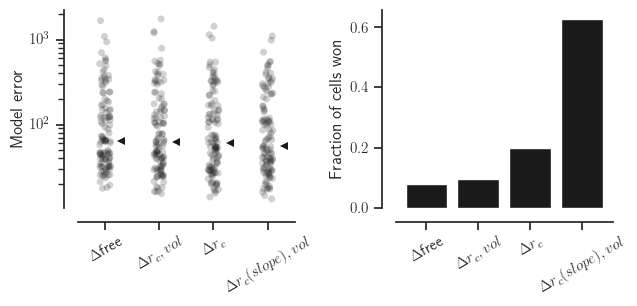

In [1909]:
# winners

nrows, ncols = 1, 2;
f, ax = plt.subplots(nrows, ncols, figsize=hf.set_size(tex_width, fraction=1, extra_height=0.8))
use_norm = False;
monochrome = True;
show_title = False
alph = 0.2

nCells = nlls_summary_all.shape[0]
sns.despine(offset=10)

norm_str = '_norm' if use_norm else ''

### first, the values

# Here's how we can find out which model had the lowest loss across cells
upper_bound = 2 if use_norm else np.Inf
if use_norm:
    # referenced to the "free" model, again
    vals = np.divide(nlls_summary_all, np.expand_dims(nlls_summary_all[:,0], axis=1));
else:
    vals = nlls_summary_all;

if monochrome:
    [ax[0].plot(i+0.3, np.median(vals[:,i,test_ind]), '<', color='k') for i in range(nMods)]
    sns.stripplot(ax=ax[0], x=np.tile(np.arange(nMods), nCells), 
                  y=hf.flatten_list(np.clip(vals[:,:,test_ind], None, upper_bound)), 
                  edgecolor='None', alpha=alph, color='k');
else:
    [ax[0].plot(i+0.3, np.median(vals[:,i,test_ind]), '<') for i in range(nMods)]
    sns.stripplot(ax=ax[0], x=np.tile(np.arange(nMods), nCells), 
                  y=hf.flatten_list(np.clip(vals[:,:,test_ind], None, upper_bound)),
                  edgecolor='None', alpha=alph);
# [ax[0].plot(i+0.15, np.median(vals[:,i,test_ind]), '<', color=param_alpha[nFreeParams[i]], markersize=10) for i in range(nMods)]
# sns.swarmplot(ax=ax[0], x=np.tile(np.arange(nMods), nCells), 
#               y=hf.flatten_list(np.clip(vals[:,:,test_ind], None, upper_bound)), 
#               hue=np.tile([param_color[nFreeParams[x]] for x in range(nMods)], nCells));
if use_norm:
    ax[0].axhline(1, color='k', linestyle='--', alpha=0.3)

# ax[0].set_xlabel('Model');
ax[0].set_ylabel('Model error');
# ax[0].set_ylabel('Distribution of %sloss across cells' % '(norm.) ' if use_norm else '');
ax[0].set_xticks(range(nMods));
ax[0].set_xticklabels(labels=[r'$\Delta$%s' % x for x in names], rotation=30);
# ax[0].set_title('Comparing loss across models (LGN, %s)' % date);
ax[0].tick_params(axis='x', which='minor', bottom=False)
if not use_norm:
    ax[0].set_yscale('log')
else: # then we don't need minor ticks; otherwise, we do want them
    ax[0].tick_params(axis='y', which='minor', left=False)

### then, the winners
# Here's how we can find out which model had the lowest loss across cells
lowest = np.argmin(nlls_summary_all[:,:,test_ind],axis=1)
_, freqs = np.unique(lowest, return_counts=True)
nCells = nlls_summary_all.shape[0]

if monochrome:
    ax[1].bar(range(nMods), height=freqs/np.sum(freqs), color='k')
else:
    ax[1].bar(range(nMods), height=freqs/np.sum(freqs), color=np.array([param_alpha[x] for x in nFreeParams]))
# ax[1].set_xlabel('Model');
ax[1].set_ylabel('Fraction of cells won');
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].set_xticks(range(nMods));
ax[1].set_xticklabels(labels=[r'$\Delta$%s' % x for x in names], rotation=30);

if show_title:
    f.suptitle('Cross-validated test performance (LGN, %s)' % date);
f.tight_layout();

# Now save, too
saveName = "/01_01_02b_cvByCondWinners_%s%s%s%s.pdf" % (date, phAdj_str, norm_str, '_mono' if monochrome else '');
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight'); # only one figure here...
pdfSv.close();

# write out text:
with open(save_loc + saveName.replace('.pdf', '.txt'), 'w') as f:
    f.write('Fraction of cells won, LGN cross-validation:')
    [f.write('%s: %.1f%%\n' % (nm, 100*freq/np.sum(freqs))) for nm, freq in zip(names, freqs)]

##### Extra plot: Relative improvement from free vs. slope model, test and train

<>:24: DeprecationWarning: invalid escape sequence \%
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


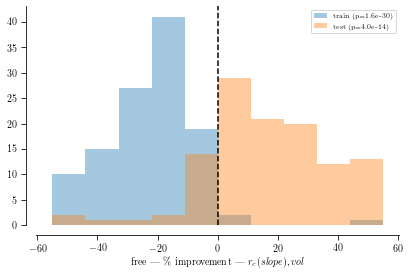

In [936]:
mod_a = 0; # free
mod_b = 3; # slope

to_clip = 50; # np.Inf
odd_bins = True;

# quantify differences...[a-b]/min(a,b)
diffs = nlls_summary_all[:,mod_a,:]-nlls_summary_all[:,mod_b,:];
to_div = np.min(nlls_summary_all[:,[mod_a, mod_b],:], axis=1)

norm_diffs = np.clip(100*diffs/to_div, -to_clip, to_clip)

plt.figure(figsize=hf.set_size(tex_width));

tr_pval = ss.ttest_1samp(norm_diffs[:,0], popmean=0).pvalue
te_pval = ss.ttest_1samp(norm_diffs[:,1], popmean=0).pvalue

oyvey = sns.distplot(norm_diffs[:,0], bins=np.linspace(-to_clip*1.1, 1.1*to_clip, 11 if odd_bins else 10), kde=False, label='train (p=%.1e)' % tr_pval)
sns.distplot(norm_diffs[:,1], bins=np.linspace(-1.1*to_clip, 1.1*to_clip, 11 if odd_bins else 10), kde=False, label='test (p=%.1e)' % te_pval)
plt.axvline(0, linestyle='--', color='k')

plt.legend(fontsize='x-small')

plt.xlabel('%s | \%% improvement | %s' % (names[mod_a], names[mod_b]))
plt.legend(fontsize='x-small');
sns.despine(offset=10)

Let's also save which cells were best for each model, how many each cell "won":

In [945]:
sv_name = '/01_01_02b_cvComparisonWinners.txt'
to_write = open('%s%s' % (save_loc, sv_name), 'w');

In [946]:
[print('(%.1f%%) %02d out of %02d cells: %s had the lowest test loss' % (100*f/nCells, f,nCells,n)) for n,f in zip(names,freqs)]

[to_write.write('(%.1f%%) %02d out of %02d cells: %s had the lowest test loss\n' % (100*f/nCells, f,nCells,n)) for n,f in zip(names,freqs)]

(7.8%) 09 out of 115 cells: free had the lowest test loss
(9.6%) 11 out of 115 cells: $r_c, vol$ had the lowest test loss
(20.0%) 23 out of 115 cells: $r_c$ had the lowest test loss
(62.6%) 72 out of 115 cells: $r_c (slope), vol$ had the lowest test loss


[58, 64, 60, 73]

In [947]:
# And just for debugging purposes, let's list out the cells for which each model was best
for ind in np.unique(lowest):
    bests = np.where(lowest==ind)[0];
    if len(bests)>0:
        print('%s model was best for cells: %s' % (names[ind], np.array2string(bests+1))) # add 1 to go from index to cell#
        to_write.write('\n%s model was best for cells: %s\n' % (names[ind], np.array2string(bests+1))) # add 1 to go from index to cell#
    else:
        print('%s model was never the best!' % names[ind])
        to_write.write('\n%s model was never the best!\n' % names[ind])
        
to_write.close();

free model was best for cells: [22 25 26 29 34 39 45 56 66]
$r_c, vol$ model was best for cells: [ 19  20  23  41  42  52  55  61  64  78 106]
$r_c$ model was best for cells: [  4   7   8  18  24  27  32  33  37  38  46  62  67  69  73  75  76  81
  83  84  85 100 107]
$r_c (slope), vol$ model was best for cells: [  1   2   3   5   6   9  10  11  12  13  14  15  16  17  21  28  30  31
  35  36  40  43  44  47  48  49  50  51  53  54  57  58  59  60  63  65
  68  70  71  72  74  77  79  80  82  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 101 102 103 104 105 108 109 110 111 112 113 114 115]


Now, let's look _within_ each cell, across contrasts

In [948]:
# lbl = ['train', 'test']

# for c in range(nCells):

#     f, ax = plt.subplots(1,2,figsize=hf.set_size(tex_width), sharey=True)

#     for i in range(2):

#         [ax[i].plot(x[:,i], label='%s [%.2f]' % (md, np.nansum(x[:,i]))) for x,md in zip(nlls_summary_perCon[c], names)]
#         ax[i].legend(fontsize='x-small');
#         ax[i].set_xlabel('increasing contrast');
#         if i==0:
#             ax[i].set_ylabel('loss across all sfs');
#         ax[i].set_title('%s loss' % lbl[i])
#     f.suptitle('Cell %02d - comparing train/test loss across con.' % (c+1))
#     sns.despine(offset=5)
    
#     # Now save, too
#     saveName = "/01_01_02c_comps%s_%s%s/cell_%03d.pdf" % (expDir_str, date, phAdj_str, c+1);
#     curr_dir = os.path.dirname(save_loc+saveName);
#     if not os.path.exists(curr_dir):
#         os.makedirs(curr_dir);
#     pdfSv = pltSave.PdfPages(save_loc + saveName);
#     pdfSv.savefig(f); # only one figure here...
#     pdfSv.close();
#     f.clf();

...and also across SFs (as of 22.05.18, will ignore the training data, since that's harder to get)

In [ ]:
# lbl = ['train', 'test']

# for c in range(nCells):

#     f, ax = plt.subplots(1,2,figsize=(20,8), sharey=True)

#     for i in range(2):

#         # messy code, but we're subsetting the loss per Sf to match the length of the actual SFS that appear for this cell (we build the array to handle the largets possible # of sfs)
#         [ax[i].semilogx(sfs_perCell[c], x[np.arange(len(sfs_perCell[c])), i], label='%s [%.2f]' % (md, np.nansum(x[:,i]))) for x,md in zip(nlls_summary_perSf[c], names)]
# #         [ax[i].plot(x[:,i], label='%s [%.2f]' % (md, np.nansum(x[:,i]))) for x,md in zip(nlls_summary_perSf[c], names)]
#         ax[i].legend(fontsize='x-small');
#         if i == 1:
#             ax[i].axvline(ref_charFreq_perCell[c], linestyle='--', alpha=0.3)
#         if i==0:
#             ax[i].set_ylabel('loss across all contrasts');
#         ax[i].set_title('%s loss' % lbl[i])
#     f.suptitle('Cell %02d - comparing train/test loss across SF (index)' % (c+1))
#     sns.despine(offset=5)
    
#     # Now save, too
#     saveName = "/01_01_02c_comps%s_%s%s/bySf_cell_%03d.pdf" % (expDir_str, date, phAdj_str, c+1);
#     curr_dir = os.path.dirname(save_loc+saveName);
#     if not os.path.exists(curr_dir):
#         os.makedirs(curr_dir);
#     pdfSv = pltSave.PdfPages(save_loc + saveName);
#     pdfSv.savefig(f); # only one figure here...
#     pdfSv.close();
#     f.clf();

# 1.2 V1
Let's apply a similar model comparison for V1 as we've done for the LGN. To keep things simple, let's apply it just for the V1/ data (i.e. not altExp, V1_orig, V1_BB)

### 1.2.00 Example tuning curves

In [2640]:
autoreload.reload(psf);

/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:801: RuntimeWarning: invalid value encountered in double_scalars
  th = [np.rad2deg(np.arctan(np.abs(y_coord[i]/x_coord[i]))) for i in range(len(x_coord))];


condition d/con/sf || 00/00/04 has (some?) nan phi; r values below
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
condition d/con/sf || 00/00/07 has (some?) nan phi; r values below
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
condition d/con/sf || 00/00/08 has (some?) nan phi; r values below
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
condition d/con/sf || 00/00/10 has (some?) nan phi; r values below
[[0. 0. 0

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);


phaseAdvanceFitsHPC_220718


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1465: UserWarning: this condition is not valid
  warnings.warn('this condition is not valid');
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001:

phaseAdvanceFitsHPC_220718


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


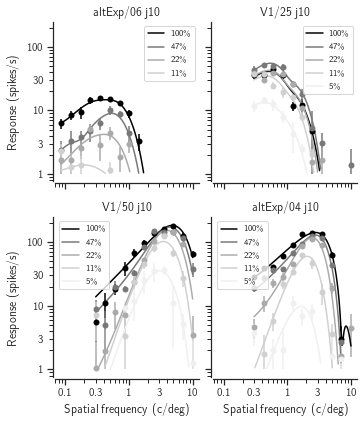

In [2644]:
common_axes = True
f,yax=plt.subplots(2,2, figsize=hf.set_size(tex_width, extra_height=1.5), sharex=common_axes, sharey=common_axes)

full=True; # show legend/titles? Should run once to have info for legend
joint = 10;
date = '220811vEs';
# date = '220807vEs';

phDate = '220718';
rvcDate = '220718'
rvcDate_altExp = '220609';

if full:
    incl_legend=True
    subplot_title=True
else:
    incl_legend=False
    subplot_title=False

    
# - first, two simples
psf.plot_sfs(yax, 0, 0, 6, 'altExp/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=3, joint=joint, rvcAdj=0, rvcBase='rvcFitsHPC_%s' % rvcDate_altExp, incl_legend=incl_legend, subplot_title=subplot_title)
psf.plot_sfs(yax, 0, 1, 25, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[0,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 0, 0, 7, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
# - then, two complex
psf.plot_sfs(yax, 1, 0, 50, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[0,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
psf.plot_sfs(yax, 1, 1, 4, 'altExp/', descrBase='descrFitsHPC_%s' % date, subset_cons=[0,2], descrMod=3, joint=joint, rvcAdj=0, rvcBase='rvcFitsHPC_%s' % rvcDate_altExp, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 1, 0, 71, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[1,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 1, 0, 4, 'altExp/', descrBase='descrFitsHPC_%s' % date, subset_cons=[0,2], descrMod=3, joint=joint, rvcAdj=0, rvcBase='rvcFitsHPC_%s' % rvcDate_altExp, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 1, 1, 63, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[0,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 1, 1, 40, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)
# psf.plot_sfs(yax, 1, 1, 17, 'V1/', descrBase='descrFitsHPC_%s' % date, subset_cons=[2,2], descrMod=3, joint=joint, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title)

if incl_legend or subplot_title:
    f.tight_layout(w_pad=-6);
else:
    f.tight_layout(w_pad=-3, h_pad=1);
#     f.subplots_adjust(wspace=-0.025)

saveName = "/01_02_00_tuning%s%s%s.pdf" % ('_lgnd' if incl_legend else '', '_ttl' if subplot_title else '', '_common' if common_axes else '')
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight') # only one figure here...
pdfSv.close()

### Model performance (all data)
First, we'll compare the model performance when fitting to all of the data.

In [1649]:
autoreload.reload(hf);

In [1650]:
from helper_fcns_sfBB import compute_f1f0 as bb_compute_f1f0
from helper_fcns_sfBB import get_resp_str as bb_get_resp_str

In [1534]:
# Specify which data to load

expDirs = ['V1', 'V1_BB', 'altExp']#, 'V1_orig'];
# comparing 2 mods
dates = ['220819vEs','220819vEs']
# dates = ['220810vEs','220810vEs']
joints = [7,10];
whichMods = [1,3]; # sach (DoG), d-DoG-S
nFreeParams = [2,3];
names = [r'DoG $r_c$ (s)', r'd-DoG-S $r_c$ (s) fx-dpl'];
# comparing 3 mods
# joints = [7,7,9];
# whichMods = [1,3,3]; # sach (DoG), d-DoG-S
# nFreeParams = [2,5,3];
# names = [r'DoG $r_c$ (s)', r'd-DoG-S $r_c$ (s)', r'd-DoG-S $r_c$ (s) fx-dpl'];
# names = [r'DoG $r_c$ (slope)', r'd-DoG-S $r_c$ (slope)', r'd-DoG-S $r_c$ (slope) fx dpl'];
isHPC = 1;
ref_ind = 0;
phAdj = 1; # vecF1 correction...
param_color = ['','','k','r','g','b']
loss_type = 2;
ref_ind = 0; # in the index of the joints that we'll use as the reference

nlls_all = [];

for expDir in expDirs:
#     date = '220810vEs'
#     date = '220808vEs'
#     date = '220720vEs' if expDir == 'V1_BB' else '220721vEs'
    phAdjCurr = 0 if expDir=='altExp' else phAdj; # as of 22.08.01, never put phAdj suffix on V1_BB fits

    dogName_ref = 'descrFits%s_%s' % ('HPC' if isHPC else '', dates[ref_ind]);
    # NOTE: Yes, the naming convention for surr/center radius models are reversed from the fit names
    # --- that's because here (and in Sach's thesis) we model the name by what does shift
    # --- in my naming convention, we name it after what does NOT shift with contrast
    nMods = len(joints);

    ref_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName_ref, modelName=hf.descrMod_name(whichMods[ref_ind]), joint=joints[ref_ind], phAdj=phAdjCurr)));
    nCells = len(ref_mod.keys());

    # Now, organize all of the loss values - raw and normalized by the reference models
    raw_ind = 0;
    norm_ind = 1;
    nlls_curr = np.nan * np.zeros((nCells, nMods, 2)); # end is [raw_ind, norm_ind]

    # Before we get the totalNLL, we need to specify which f0/f1, if it's sfBB
    if 'BB' in expDir:
        dl = hf.np_smart_load('%s/structures/%s' % (expDir, hf.get_datalist(expDir+'/', force_full=1)));
        
    for (i,j),date in zip(enumerate(joints), dates):
        dogName = 'descrFits%s_%s' % ('HPC' if isHPC else '', date);

        curr_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(whichMods[i]), joint=j, phAdj=phAdjCurr)));
        if curr_mod == []:
            continue;
            
        if 'BB' in expDir: # then we have to do more work, first
            for c in sorted(curr_mod.keys()): # just to make sure it's in the same order for each model (should already be)
                curr_cell = hf.np_smart_load('%s/structures/%s_sfBB.npy' % (expDir, dl['unitName'][c]));
                f1f0_str = bb_get_resp_str(bb_compute_f1f0(curr_cell['sfBB_core'])[0] > 1);
                nlls_curr[c,i,0] = curr_mod[c][f1f0_str]['mask']['totalNLL']; # assmes j>0...
        else:
            nlls_curr[:, i, 0] = np.array([curr_mod[x]['totalNLL'][0] for x in range(nCells)]) if j>0 else np.array([np.nansum(curr_mod[x]['NLL'][0]) for x in range(nCells)]);

    # then normalize, too:
    nlls_curr[:,:,1] = np.divide(nlls_curr[:,:,0], np.repeat(np.transpose([nlls_curr[:,ref_ind,0]]), nMods, axis=1))
    
    # and add to overall list...
    if nlls_all == []:
        nlls_all = nlls_curr;
    else:
        nlls_all = np.vstack((nlls_all, nlls_curr));

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:69: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


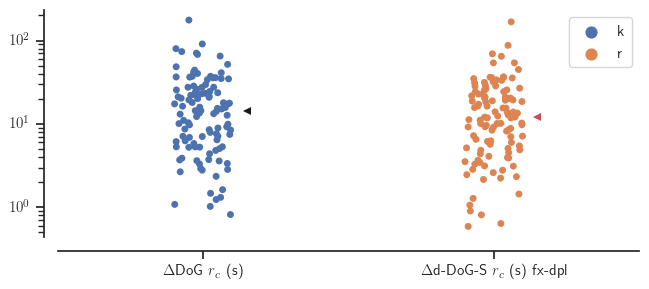

In [1535]:
use_norm = 0;
upper_bound = 2 if use_norm else np.Inf;

nMods = len(joints)

f = plt.figure(figsize=hf.set_size(tex_width, extra_height=0.9));

nCells = nlls_all.shape[0]
[plt.plot(i+0.15, np.nanmedian(nlls_all[:,i,use_norm]), '<', color=param_color[nFreeParams[i]]) for i in range(nMods)]
sns.stripplot(x=np.tile(np.arange(nMods), nCells), y=hf.flatten_list(np.clip(nlls_all[:,:,use_norm], None, upper_bound)), hue=np.tile([param_color[nFreeParams[x]] for x in range(nMods)], nCells));

if use_norm:
    plt.axhline(1, color='k', linestyle='--', alpha=0.3)
else:
    plt.yscale('log')
    
# plt.xlabel('model');
plt.ylabel('Distribution of %sloss across cells' % '(norm.) ' if use_norm else '');
plt.xticks(ticks=np.arange(nMods), labels=[r'$\Delta$%s' % x for x in names], rotation=30);
# plt.title('Comparing loss across models (V1, %s)' % date);
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='y', which='minor', left=True)

f.tight_layout();

sns.despine(offset=10)

saveName = "/01_02_02a_loss_nonCV_%s%s.pdf" % (date, '_norm' if use_norm else '');
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight'); # only one figure here...
pdfSv.close()

### Cross-validation by condition
Now, what about cross-validation?

In [1893]:
# thresh = 10;
thresh = -1e5;

# expDirs = ['altExp', 'V1_BB']#, 'V1_orig'];
expDirs = ['V1', 'altExp', 'V1_BB']#, 'V1_orig'];
joints = [7,10];
whichMods = [1,3]; # sach (DoG), d-DoG-S
nFreeParams = [2,3];
names = [r'DoG', r'd-DoG-S'];
# names = [r'DoG $r_c$ (s)', r'd-DoG-S $r_c$ (s) fxDbl'];

# joints = [7,7,9];
# whichMods = [1,3,3]; # sach (DoG), d-DoG-S
# nFreeParams = [2,5,3];
# names = [r'DoG $r_c$ (slope)', r'd-DoG-S $r_c$ (slope)', r'd-DoG-S $r_c$ (slope) fx dpl'];

# joints = [7,7,8,9];
# whichMods = [1,3,3,3]; # sach (DoG), d-DoG-S
# nFreeParams = [2,5,4,3];
# names = [r'DoG $r_c$ (slope)', r'd-DoG-S $r_c$ (slope)', r'd-DoG-S $r_c$ (slope) dpl', r'd-DoG-S $r_c$ (slope) fx dpl'];
isHPC = 1;
ref_ind = 0;
phAdj = 1; # vecF1 correction...
param_color = ['','','k','r','g','b']
loss_type = 2;
ref_ind = 0; # in the index of the joints that we'll use as the reference

ref_dog = whichMods[ref_ind]

nlls_summary_all = [];

for expDir in expDirs:

    # Load the datalist, so that we can check the responses, and only consider responses > 5 spks/sec?
    dl_name = hf.get_datalist(expDir+'/', force_full=1)
    dl = hf.np_smart_load('%s/structures/%s' % (expDir, dl_name));
    cell_names = dl['unitName'];

    date = '220826vEs';
#     date = '220819vEs';
#     date = '220808vEs';
#     date = '220720vEs' if expDir == 'V1_BB' else '220721vEs'
    phAdjCurr = 0 if expDir=='altExp' else phAdj; # as of 22.08.01, never put phAdj suffix on V1_BB fits

    dogName = 'descrFits%s_%s' % ('HPC' if isHPC else '', date);

    nMods = len(joints);

    ref_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(whichMods[ref_ind]), joint=joints[ref_ind], phAdj=phAdjCurr)));
    nCells = len(ref_mod.keys());

    if 'BB' in expDir:
        nBoots = ref_mod[0]['dc']['mask']['boot_paramList'].shape[0];
        for c in sorted(ref_mod.keys()):
            ref_mod[c] = ref_mod[c]['dc']['mask'];
        isBB = True;
    else:
        nBoots = ref_mod[0]['boot_paramList'].shape[0];
        isBB = False;

    print('%s --> %02d cells' % (expDir, nCells))
    
    # Now, organize all of the loss values - raw and normalized by the reference models
    train_ind=0;
    test_ind=1;
    ### As for organizing/analyzing, let's do the following:
    # 1. Here, each model gets one number - total loss across all conditions
    # --- then ...,2 for non-heldout total LOSS [0] and [1] for the sum of all single-condition-holdout test losses
    nlls_summary = np.nan * np.zeros((nCells, nMods, 2));
    # 2. Now, split the loss into condition - i.e. one test loss per sfXcon condition
    # --- and again ...,2 for loss when condition incl. in fit [0] and [1] heldout (i.e. test)
    # - Well, first we need to find out how many CONS/SFS for each cell
    # --- we can work backwords, since nBoots for c-v by cond. is nB=nCons*nSfs and the length of NLL is #cons
    nCons_perCell = np.array([np.sum(~np.isnan(ref_mod[c]['NLL'][0])) for c in ref_mod.keys()]);
    nBoots_perCell = np.array([ref_mod[c]['boot_NLL_cv_test'][0].shape[0] for c in ref_mod.keys()]);
    nSfs_perCell = np.divide(nBoots_perCell, nCons_perCell).astype('int');
    nCons, nSfs = np.max(nCons_perCell), np.max(nSfs_perCell);
        
    # NOTE: As of 22.05.11, we can only evaluate loss per contrast for the full model (i.e. train)
    nlls_summary_perCon = np.nan * np.zeros((nCells, nMods, nCons, 2));
    nlls_summary_perSf = np.nan * np.zeros((nCells, nMods, nSfs, 2));
    # nlls_summary_perCond = np.nan * np.zeros((nCells, nMods, nCons, nSfs, 2));
    sfs_perCell = [];
#     ref_charFreq_perCell = [];

    for i,j in enumerate(joints):
        curr_dog = whichMods[i]
        curr_mod = hf.np_smart_load('%s/structures/%s' % (expDir, hf.descrFit_name(loss_type, descrBase=dogName, modelName=hf.descrMod_name(curr_dog), joint=j, phAdj=phAdjCurr)));
        for c in range(nCells):

            # let's find out the high contrast char. freq as inferred from the ref mod
#             ref_charFreq_perCell.append(hf.dog_charFreq(ref_mod[c]['params'][0,-1], DoGmodel=curr_dog));

            if 'BB' in expDir: # then we have to do more work, first
                # TODO: MAKE SURE THIS WORKS
                curr_cell = hf.np_smart_load('%s/structures/%s_sfBB.npy' % (expDir, cell_names[c]));
                f1f0_str = bb_get_resp_str(bb_compute_f1f0(curr_cell['sfBB_core'])[0] > 1);
                curr_mod[c] = curr_mod[c][f1f0_str]['mask']; # overwrite so that we only have DC OR F1, only mask
            
            test_nll = curr_mod[c]['boot_NLL_cv_test'] if isBB else curr_mod[c]['boot_NLL_cv_test'][0];
            
            if thresh>0:
                cell_name = cell_names[c]

                # let's also load the current cell and get the SFS so we can:
                # - evaluate the REFERENCE model (only) on these SFS
                # --- why ref. model? so that we make sure that we consider the same conditions for all models
                # - and optionally filter out any conditions with a response below a particular value
                # NOTE: boot_NLL_cv conditions are ordered by sf
                # -- i.e. conditions 0-X are the lowest contrast, first X SFs; then X+1-2x are second lowest contrast...and so on
                curr_cell = hf.np_smart_load('%s/structures/%s_sfm.npy' % (expDir, cell_name));
                expInd = hf.get_exp_ind('%s/structures/' % expDir, cell_name)[0];
                _,conds,vc,_,_=hf.tabulate_responses(curr_cell['sfm']['exp']['trial'], expInd=expInd)
                sfs = conds[2]
                sfs_perCell.append(sfs);
                mod_resps = np.array([hf.get_descrResp(ref_mod[c]['params'][0,x], sfs, DoGmodel=ref_dog) for x in np.where(~np.isnan(ref_mod[c]['params'][0,:,-1]))[0]]);
                # ^ mod_resps is nCons x nSfs (i.e. exactly as boot_NLL_cv once flattened)
                mod_rps = mod_resps.flatten();
                inval_conds = np.where(mod_rps<thresh)[0];

                test_nll[inval_conds,0] = 0; # just zero it           

            # First, handle the totalNLL
            # -- train            
            try:
                if j>0:
                    nlls_summary[c,i,train_ind] = curr_mod[c]['totalNLL'] if isBB else curr_mod[c]['totalNLL'][0]
                else:
                    nlls_summary[c,i,train_ind] = np.nansum(curr_mod[c]['NLL']) if isBB else np.nansum(curr_mod[c]['NLL'][0])
            except:
                pass;
            # -- test
            try:
                if isBB:
                    if np.any(~np.isnan(test_nll)):
                        nlls_summary[c,i,test_ind] = np.nansum(test_nll)
                else:
                    if np.any(~np.isnan(test_nll[:,0])):
                        nlls_summary[c,i,test_ind] = np.nansum(test_nll[:,0])
            except:
                pass;
            # Now, we'll split per contrast
            # -- train
            try:
                curr_perCond = hf.nan_rm(curr_mod[c]['NLL']) if isSach else hf.nan_rm(curr_mod[c]['NLL'][0]);
                nlls_summary_perCon[c,i,0:len(curr_perCond),train_ind] = curr_perCond;
            except:
                pass;
            # -- test
            try:
                # by contrast
                curr_perCond = np.nansum(test_nll, axis=0) if isSach else np.nansum(test_nll[:,0],axis=0)
                curr_perCond = curr_perCond[curr_perCond>0]; # if it's 0, then this is just a missing condition
                nlls_summary_perCon[c,i,0:len(curr_perCond),test_ind] = curr_perCond;
                # and now, by SF, too
                nConds = curr_mod[c]['boot_NLL_cv_test'].shape[0] if isSach else curr_mod[c]['boot_NLL_cv_test'][0].shape[0];
                nSfs_curr=nSfs_perCell[c];
                val_cons = vc[0]; # 0 disp case
                # why? for my data, we need to access only the relevant contrast indices
                curr_perCond = np.array([np.nansum([test_nll[tot_ind,0,val_cons[con_ind]] for con_ind,tot_ind in enumerate(np.arange(x, nConds, nSfs_curr))]) for x in range(nSfs_curr)]);
                curr_perCond = curr_perCond[curr_perCond>0]; # if it's 0, then this is just a missing condition
                nlls_summary_perSf[c,i,0:len(curr_perCond),test_ind] = curr_perCond;
            except:
                pass;
            
    # then, combine!
    if nlls_summary_all == []:
        nlls_summary_all = nlls_summary;
    else:
        nlls_summary_all = np.vstack((nlls_summary_all, nlls_summary));



V1 --> 81 cells


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide


altExp --> 08 cells
V1_BB --> 47 cells


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:167: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


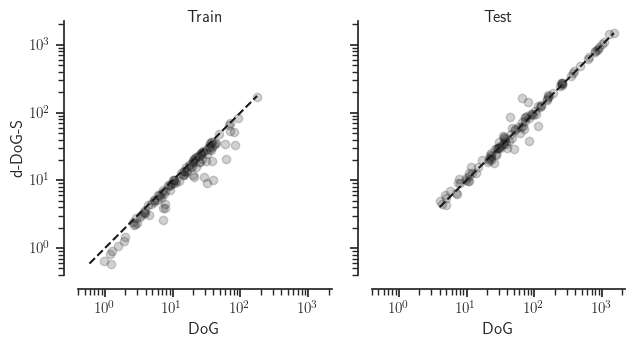

In [1904]:
# winners

nrows, ncols = 1, 2;
f, ax = plt.subplots(nrows, ncols, figsize=hf.set_size(tex_width), sharex=True, sharey=True)
# f, ax = plt.subplots(nrows, ncols, figsize=hf.set_size(tex_width, subplots=(nrows,ncols)));
use_norm = False;
pub_titles = True;

nCells = nlls_summary_all.shape[0]
sns.despine(offset=10)
alph = 0.2;

norm_str = '_norm' if use_norm else ''
by_ind = ['Train', 'Test'];

g = open(save_loc + saveName.replace('.pdf', '.txt'), 'w')

for i in range(2): # first train, then test

    val_inds = np.logical_and(~np.isnan(nlls_summary_all[:,0,i]), ~np.isnan(nlls_summary_all[:,1,i]));
    mn,mx = np.nanmin(nlls_summary_all[val_inds,:,i]), np.nanmax(nlls_summary_all[val_inds,:,i])
    ax[i].plot([mn,mx],[mn,mx],linestyle='--',color='k')
    
    ax[i].scatter(nlls_summary_all[val_inds,0,i], nlls_summary_all[val_inds,1,i], alpha=alph, color='k')
#     ax[i].scatter(*np.transpose(nlls_summary_all[:,:,i]))
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('%s' % names[0])
    if i==0:
        ax[i].set_ylabel('%s' % names[1])
    ax[i].axis('scaled');
    n_winners = [np.sum(np.argmin(nlls_summary_all[val_inds,:,i],axis=1)==0), np.sum(np.argmin(nlls_summary_all[val_inds,:,i],axis=1)==1)]
    if pub_titles:
        ax[i].set_title(r'%s' % (by_ind[i]), y=0.97)
    else:
        ax[i].set_title(r'%s (tot=%d|%d) [%02d|%02d]' % (by_ind[i], *np.nansum(nlls_summary_all[val_inds,:,i], axis=0), *n_winners))

    # write out text:
    g.write('Cells won, V1 %s:\n' % by_ind[i])
    [g.write('%s: %d, %.1f%%\n' % (nm, wins, 100*wins/np.sum(n_winners))) for nm, wins in zip(names, n_winners)]
    g.write('\n');
    
g.close();
    
if not pub_titles:
    f.suptitle(r'\textit{Model performance (V1, %s)}' % date);
f.tight_layout();

# Now save, too
saveName = "/01_02_02b_cvByCondWinnersScatter_%s%s.pdf" % (date, norm_str);
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight'); # only one figure here...
pdfSv.close();


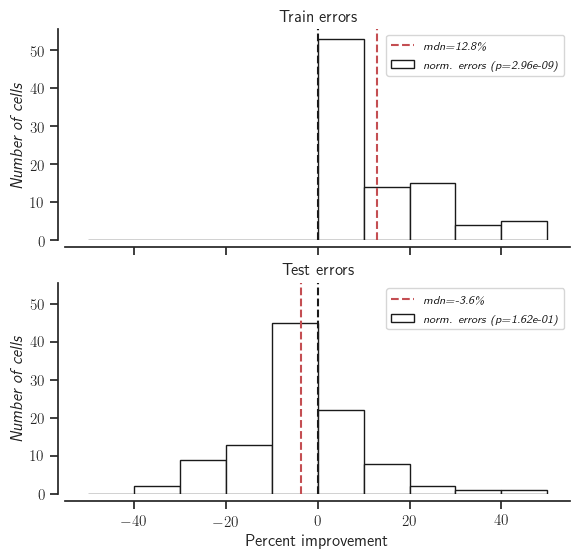

In [1896]:
stack_plots = True;

# quantify differences...[a-b]/min(a,b)
diffs = nlls_summary_all[:,0,:]-nlls_summary_all[:,1,:];
to_div = np.min(nlls_summary_all, axis=1)

norm_diffs = 100*diffs/to_div
perc_bound=30;
n_bins=10;

odd=True;
mn = False; # if false, then use median

# only applies to non-stack
clr_bar = 'white'
clr_edge = 'k'

if not stack_plots:

    plt.figure(figsize=hf.set_size(tex_width))
#     plt.figure(figsize=(10,5))

    train_pval = ss.ttest_1samp(hf.nan_rm(norm_diffs[:,0]), popmean=0).pvalue
    test_pval = ss.ttest_1samp(hf.nan_rm(norm_diffs[:,1]), popmean=0).pvalue

    sns.distplot(norm_diffs[:,0], bins=np.linspace(-50,50,n_bins+1 if odd else n_bins), kde=False, label=r'\textit{train norm. errors (p=%.2e)}' % train_pval)
    sns.distplot(norm_diffs[:,1], bins=np.linspace(-50,50,n_bins+1 if odd else n_bins), kde=False, label=r'\textit{test norm. errors (p=%.2e)}' % test_pval)
    plt.axvline(0, color='k',linestyle='--')

    plt.xlabel('DoG <--| % improvement |--> d-DoG-S')
    plt.legend(fontsize='x-small');

else:
    
    f, ax = plt.subplots(2,1,figsize=hf.set_size(tex_width,subplots=(2,1), extra_height=0.75), sharey=True, sharex=True)
#     f, ax = plt.subplots(2,1,figsize=(10,2*4), sharey=True, sharex=True)

    train_pval = ss.ttest_1samp(hf.nan_rm(norm_diffs[:,0]), popmean=0).pvalue
    test_pval = ss.ttest_1samp(hf.nan_rm(norm_diffs[:,1]), popmean=0).pvalue

    ax[0].hist(norm_diffs[:,0], bins=np.linspace(-50,50,n_bins+1 if odd else n_bins), color=clr_bar, edgecolor=clr_edge, rwidth=1, label=r'\textit{norm. errors (p=%.2e)}' % train_pval)
    if mn:
        ax[0].axvline(np.nanmean(norm_diffs[:,0]), color='r', ls='--', label=r'\textit{mn=%.1f\%%}' % np.nanmean(norm_diffs[:,0]))
    else:
        ax[0].axvline(np.nanmedian(norm_diffs[:,0]), color='r', ls='--', label=r'\textit{mdn=%.1f\%%}' % np.nanmedian(norm_diffs[:,0]))
    
    ax[1].hist(norm_diffs[:,1], bins=np.linspace(-50,50,n_bins+1 if odd else n_bins), color=clr_bar, edgecolor=clr_edge, rwidth=1, label=r'\textit{norm. errors (p=%.2e)}' % test_pval)
    if mn:
        ax[1].axvline(np.nanmean(norm_diffs[:,1]), color='r', ls='--', label=r'\textit{mn=%.1f\%%}' % np.nanmean(norm_diffs[:,1]))
    else:
        ax[1].axvline(np.nanmedian(norm_diffs[:,1]), color='r', ls='--', label=r'\textit{mdn=%.1f\%%}' % np.nanmedian(norm_diffs[:,1]))

    for i,lbl_curr in enumerate(['Train', 'Test']):
        ax[i].axvline(0, color='k',linestyle='--')
        ax[i].set_title('%s errors' % lbl_curr)
        ax[i].legend(fontsize='x-small')
        ax[i].set_ylabel(r'\textit{Number of cells}')
        
#     ax[1].set_xlabel(r'DoG | improvement | d-DoG-S')
    ax[1].set_xlabel(r'Percent improvement')
    sns.despine(offset=5)
    
# Now save, too
saveName = "/01_02_02b_cvNormDiffs_%s%s.pdf" % (date, norm_str);
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight'); # only one figure here...
pdfSv.close();

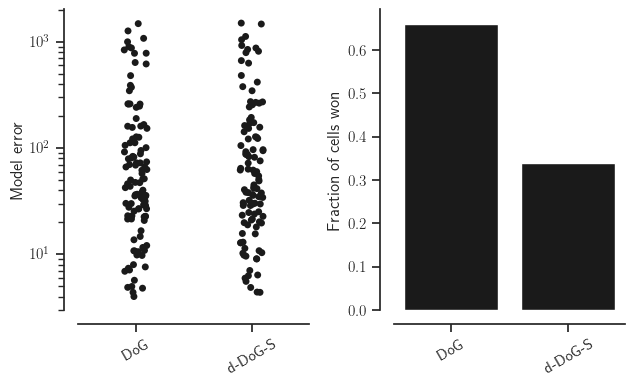

In [1897]:
nrows, ncols = 1, 2;
f, ax = plt.subplots(nrows, ncols, figsize=hf.set_size(tex_width, subplots=(nrows,ncols), extra_height=2))
# f, ax = plt.subplots(nrows, ncols, figsize=(ncols*10,nrows*10))
use_norm = False;
nCells = nlls_summary_all.shape[0]
sns.despine(offset=10)

norm_str = '_norm' if use_norm else ''

### first, the values

# Here's how we can find out which model had the lowest loss across cells
upper_bound = 2 if use_norm else np.Inf
if use_norm:
    # referenced to the "free" model, again
    vals = np.divide(nlls_summary_all, np.expand_dims(nlls_summary_all[:,0], axis=1));
else:
    vals = nlls_summary_all;

[ax[0].plot(i+0.15, np.median(vals[:,i,test_ind]), '<', color='k') for i in range(nMods)]
# [ax[0].plot(i+0.15, np.median(vals[:,i,test_ind]), '<', color=param_alpha[nFreeParams[i]], markersize=10) for i in range(nMods)]
oy = sns.stripplot(ax=ax[0], x=np.tile(np.arange(nMods), nCells), 
              y=hf.flatten_list(np.clip(vals[:,:,test_ind], None, upper_bound)), 
            color='k');
#               hue=np.tile([param_color[nFreeParams[x]] for x in range(nMods)], nCells));
# oy.get_legend().remove() # only need if using hue

if use_norm:
    ax[0].axhline(1, color='k', linestyle='--', alpha=0.3)

if not use_norm:
    ax[0].set_yscale('log')
else: # then we don't need minor ticks; otherwise, we do want them
    ax[0].tick_params(axis='y', which='minor', left=False)
# ax[0].set_xlabel('model');
ax[0].set_ylabel('%sModel error' % ('(norm.) ' if use_norm else ''));
ax[0].set_xticks(range(nMods));
ax[0].set_xticklabels(labels=[r'%s' % x for x in names], rotation=30);
# ax[0].set_title('Compare (V1, %s)' % date);
ax[0].tick_params(axis='x', which='minor', bottom=False)

### then, the winners
# Here's how we can find out which model had the lowest loss across cells
val_inds = np.logical_and(~np.isnan(nlls_summary_all[:,0,i]), ~np.isnan(nlls_summary_all[:,1,i]));
lowest = np.argmin(nlls_summary_all[val_inds,:,test_ind],axis=1)
_, freqs = np.unique(lowest, return_counts=True)
nCells = nlls_summary_all.shape[0]

ax[1].bar(range(nMods), height=freqs/np.sum(freqs), color='k')
# ax[1].bar(range(nMods), height=freqs/np.sum(freqs), color=np.array([param_alpha[x] for x in nFreeParams]))
# ax[1].set_xlabel('model');
ax[1].set_ylabel('Fraction of cells won');
ax[1].tick_params(axis='x', which='minor', bottom=False)
ax[1].set_xticks(range(nMods));
ax[1].set_xticklabels(labels=[r'%s' % x for x in names], rotation=30);

if show_title:
    f.suptitle('Cross-validated test performance (V1, %s)' % date);
f.tight_layout();

# Now save, too
saveName = "/01_02_02b_cvByCondWinners_%s%s.pdf" % (date, norm_str);
curr_dir = os.path.dirname(save_loc+saveName);
if not os.path.exists(curr_dir):
    os.makedirs(curr_dir);
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f); # only one figure here...
pdfSv.close();

# write out text:
with open(save_loc + saveName.replace('.pdf', '.txt'), 'w') as f:
    f.write('Fraction of cells won, V1 cross-validation:')
    [f.write('%s: %.1f%%\n' % (nm, 100*freq/np.sum(freqs))) for nm, freq in zip(names, freqs)]

### d-DoG-S simulation

In [1394]:
autoreload.reload(hf);

In [1395]:
def inv_sig(x):
    return -np.log((1-x)/x);

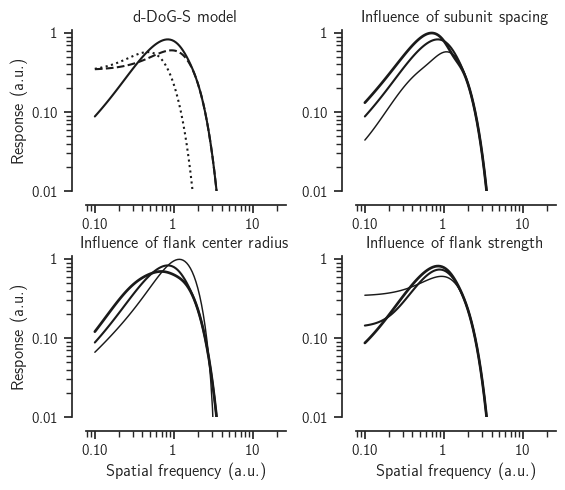

In [1865]:
pub_titles=True

# DOG params
lower_left = 2; # 0/1/2 --> center radius, surround strength, flank center radius
if lower_left==0:
    ll_str = '_cr'
else:
    ll_str = '_fcr' if lower_left==2 else '_ss'

normed = True;
    
# Hawk parameters, 13a (Hawken and Parker, 1987)
# init_gainc1 = 48.7
# init_gains1 = 14.8/init_gainc1;
# init_gainc2 = 39.1/init_gainc1;
# init_gains2 = 4.4/39.1
# ref_params_dog1 = [init_gainc1, hf.arcmin_to_deg(4.07), inv_sig(init_gains1), 5.99/4.07];
# ref_params_dog2 = [inv_sig(init_gainc2), 8.40/4.07, inv_sig(init_gains2), 33.6/8.40]; # the center params (first two) are relative to dog1
# ref_params_sep = [0, np.inf];

# my initial parameters - 220813
ref_params_dog1 = [100, 0.2, inv_sig(0.7), 2];
ref_params_dog2 = [inv_sig(0.95), 2, inv_sig(0.7), 2]; # the center params (first two) are relative to dog1
ref_params_sep = [-np.inf, 0];
# ref_params_sep = [-np.inf, -np.inf];

# my initial parameters - 220807
# ref_params_dog1 = [150, 0.2, 3.14, 1.3];
# ref_params_dog2 = [0.95, 1, 3.14, 1.3]; # the center params (first two) are relative to dog1
# ref_params_sep = [-np.inf, -np.inf];
# ref_params_dog1 = [90, 0.1, 2.14, 1.5];
# ref_params_dog2 = [0.8, 1, 2.14, 1.5]; # the center params (first two) are relative to dog1
# ref_params_sep = [-np.inf, 0];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [-np.inf,1,0,0], ref_params_sep))
ref_params_dog2_only = np.hstack((np.hstack((ref_params_dog1[0]*hf.sigmoid(ref_params_dog2[0]), 
                                             ref_params_dog1[1]*ref_params_dog2[1],
                                             ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 20, 100);

del_linewidth = True;

nrow, ncol = 2,2
# f, ax = plt.subplots(nrow, ncol, figsize=(nrow*8,ncol*6))
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1.25));#figsize=(nrow*8,ncol*6))

### all log-log
saveName = "/01_02_03_ddogs_simulation%s%s%s_220813.pdf" % (ll_str, '_titles' if not pub_titles else '', 'norm' if normed else '')
if pub_titles:
    g = open(save_loc + saveName.replace('.pdf', '.txt'), 'w')
    g.write('d-DoG-S parameters: %s\n' % f'{" ".join(format(c, ".2f") for c in ref_params_all)}')

# first, just a simple DoG
prms_norm = np.copy(ref_params_all);
prms_norm[-1] = np.Inf; # biggest response when spacing is max
to_norm = np.nanmax(hf.parker_hawken(prms_norm, stim_sf=vals)) if normed else 1

ax[0,0].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals)/to_norm, 'k-')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals)/to_norm, 'k--')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals)/to_norm, 'k:')
if pub_titles:
    ax[0,0].set_title('d-DoG-S model')
else:
    ax[0,0].set_title('d-DoG-S model; $x_c$=%.1f\'' % hf.arcmin_to_deg(ref_params_dog1[1], reverse=True))

# then, subunit spacing
rel_spac = [-np.Inf,0,np.Inf]
for ii,rel_s in enumerate(rel_spac):
    prms_curr = np.copy(ref_params_all);
    prms_curr[-1] = rel_s;
    
    # now, change the linewidth to be a fraction of the default
#     curr_lw = v/np.median(vols) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    smaller = hf.arcmin_to_deg(np.minimum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    larger = hf.arcmin_to_deg(np.maximum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    curr_space = smaller + hf.sigmoid(rel_s)*larger

    ax[0,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals)/to_norm, 'k-', label='%.2f\'' % curr_space, linewidth=curr_lw)#, alpha=v)
    if not pub_titles:
        ax[0,1].legend(fontsize='small')
    #     ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0], 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
ax[0,1].set_title('Influence of subunit spacing')

if lower_left==0:
    # then, rc
    rcs = [0.05,0.1,0.2]
    for ii,r in enumerate(rcs):
        prms_curr = np.copy(ref_params_all);
        prms_curr[1] = r;
        alph = 1 - r/rcs[-1] + 0.1

        # now, change the linewidth to be a fraction of the default
        curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']

        ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals)/to_norm, 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
        if not pub_titles:
            ax[1,0].legend(fontsize='small')

    #     prms_curr[2] = 0; # shut off the suround, and plot only the center...
    #     prms_curr[6] = 0; # shut off the suround, and plot only the center...
    #     ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k--', linewidth=curr_lw)
    ax[1,0].set_title('Influence of center radius')
elif lower_left==1:
    # then, surr. strength
    ks = [inv_sig(0.5),inv_sig(0.7),inv_sig(0.9)]
    for ii,r in enumerate(ks):
        prms_curr = np.copy(ref_params_all);
        prms_curr[2] = r;
        prms_curr[6] = r;
        alph = 1 - r/ks[-1] + 0.1

        # now, change the linewidth to be a fraction of the default
        curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']

        ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals)/to_norm, 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
        if not pub_titles:
            ax[1,0].legend(fontsize='small')

    ax[1,0].set_title('Influence of surround strength')
elif lower_left==2:
    rcs = [1, 2, 3]
    for ii,r in enumerate(rcs):
        prms_curr = np.copy(ref_params_all);
        prms_curr[5] = r;
        alph = 1 - r/rcs[-1] + 0.1

        # now, change the linewidth to be a fraction of the default
        curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']

        ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals)/to_norm, 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
        if not pub_titles:
            ax[1,0].legend(fontsize='small')

#         prms_curr[2] = 0; # shut off the suround, and plot only the center...
#         prms_curr[6] = 0; # shut off the suround, and plot only the center...
#         ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k--', linewidth=curr_lw)
    ax[1,0].set_title('Influence of flank center radius')

# then, flank strength
rss = [-np.Inf, 0.4, 2.14]
for ii,r in enumerate(rss):
    prms_curr = np.copy(ref_params_all);
    prms_curr[4] = r;
    alph = 1 - r/rss[-1] + 0.1

    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
#     curr_lw = np.sqrt(r/np.median(rss)) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals)/to_norm, 'k-', label='%.2f' % hf.sigmoid(r), linewidth=curr_lw)#, alpha=alph)
    
    if not pub_titles:
        ax[1,1].legend(fontsize='small')
ax[1,1].set_title('Influence of flank strength')

for i,j in itertools.product(range(2),range(2)):
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylim([.01, 1.1]) if normed else ax[i,j].set_ylim([1, 100]) 
    if i == 1:
        xlbl = '(a.u.)' if normed else '(c/deg)'
        ax[i,j].set_xlabel('Spatial frequency %s' % xlbl)
    if j == 0:
        ylbl = '(a.u.)' if normed else '(spikes/s)'
        ax[i,j].set_ylabel('Response %s' % ylbl)
    ax[i,j].set_aspect('equal')

    for jj, axis in enumerate([ax[i,j].xaxis, ax[i,j].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.2f' % x)) # this will make everything in non-scientific notation!                                                                                                                     
    
sns.despine(offset=10)
if not pub_titles:
    f.suptitle(r'Influence of d-DoG-S parameters')
else:
    g.close(); # close the txt file to which we wrote the information
    
f.subplots_adjust(wspace=0.15, hspace=0.4);
# f.tight_layout()

full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f, bbox_inches='tight') # only one figure here...
pdfSv.close()


##### Other explorations/simulations from d-DoG-S model

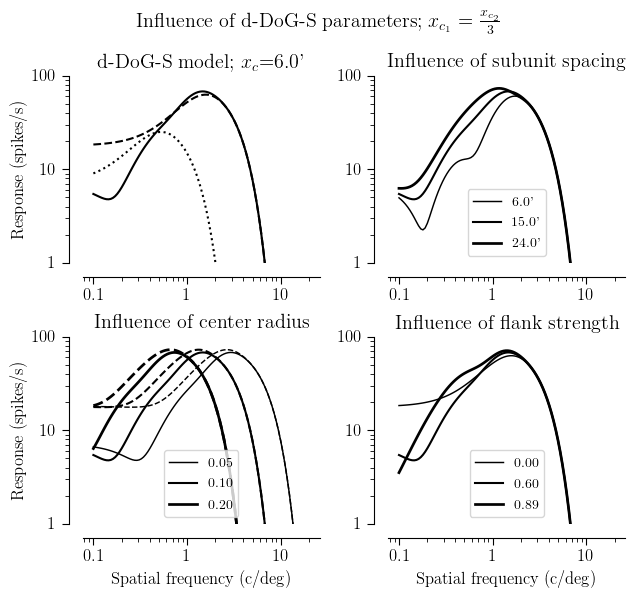

In [520]:
# DOG params
ref_params_dog1 = [90, 0.1, 1.4, 3];
ref_params_dog2 = [0.4, 3, 1.4, 3]; # the center params (first two) are relative to dog1
ref_params_sep = [-np.inf, 0];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [-np.inf,1,0,0], ref_params_sep))
ref_params_dog2_only = np.hstack((np.hstack((np.multiply(ref_params_dog1[0:2], ref_params_dog2[0:2]), 
                                             ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 20, 100);

del_linewidth = True;

nrow, ncol = 2,2
# f, ax = plt.subplots(nrow, ncol, figsize=(nrow*8,ncol*6))
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1.5));#figsize=(nrow*8,ncol*6))

### all log-log

# first, just a simple DoG
ax[0,0].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals), 'k-')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals), 'k--')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals), 'k:')
ax[0,0].set_title('d-DoG-S model; $x_c$=%.1f\'' % hf.arcmin_to_deg(ref_params_dog1[1], reverse=True))

# then, subunit spacing
vols = [-np.Inf,0,np.Inf]
for ii,v in enumerate(vols):
    prms_curr = np.copy(ref_params_all);
    prms_curr[-1] = v;
    
    # now, change the linewidth to be a fraction of the default
#     curr_lw = v/np.median(vols) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    smaller = hf.arcmin_to_deg(np.minimum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    larger = hf.arcmin_to_deg(np.maximum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    curr_space = smaller + hf.sigmoid(v)*larger
    
    ax[0,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.1f\'' % curr_space, linewidth=curr_lw)#, alpha=v)
    ax[0,1].legend(fontsize='small')
    #     ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0], 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
ax[0,1].set_title('Influence of subunit spacing')

# then, rc
rcs = [0.05,0.1,0.2]
for ii,r in enumerate(rcs):
    prms_curr = np.copy(ref_params_all);
    prms_curr[1] = r;
    alph = 1 - r/rcs[-1] + 0.1
    
    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
    ax[1,0].legend(fontsize='small')
    
    prms_curr[2] = 0; # shut off the suround, and plot only the center...
    prms_curr[6] = 0; # shut off the suround, and plot only the center...
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k--', linewidth=curr_lw)
ax[1,0].set_title('Influence of center radius')

# then, flank strength (sigmoid input)
rss = [-np.Inf, 0.4, 2.14]
for ii,r in enumerate(rss):
    prms_curr = np.copy(ref_params_all);
    prms_curr[4] = r;
    alph = 1 - r/rss[-1] + 0.1

    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
#     curr_lw = np.sqrt(r/np.median(rss)) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.2f' % hf.sigmoid(r), linewidth=curr_lw)#, alpha=alph)
    
    ax[1,1].legend(fontsize='small')
ax[1,1].set_title('Influence of flank strength')

for i,j in itertools.product(range(2),range(2)):
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylim([1, 100])
    if i == 1:
        ax[i,j].set_xlabel('Spatial frequency (c/deg)')
    if j == 0:
        ax[i,j].set_ylabel('Response (spikes/s)')
    ax[i,j].set_aspect('equal')

    for jj, axis in enumerate([ax[i,j].xaxis, ax[i,j].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                     
    
sns.despine(offset=10)
f.suptitle(r'Influence of d-DoG-S parameters; $x_{c_1}=\frac{x_{c_2}}{3}$')

f.tight_layout()

saveName = "/01_02_03b_ddogs_simulation_diffXC.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()


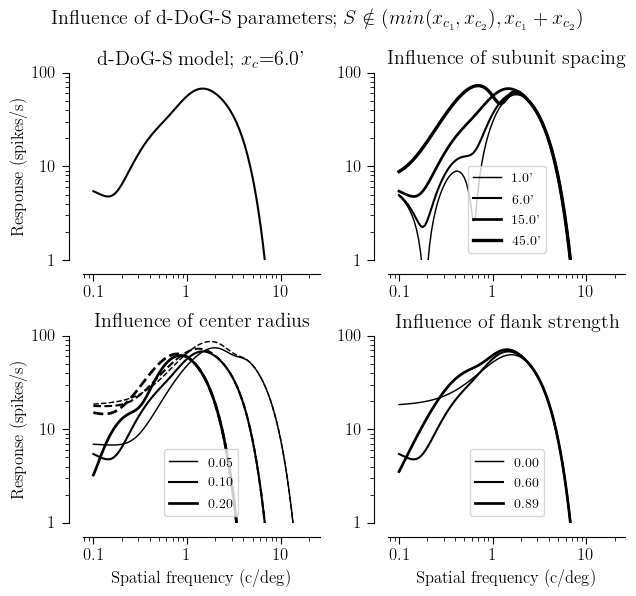

In [527]:
# DOG params
xc1 = 0.1; rel_xc2 = 3;
ref_params_dog1 = [90, xc1, 1.4, xc1*3];
ref_params_dog2 = [0.4, rel_xc2, 1.4, 3]; # the center params (first two) are relative to dog1
ref_params_dog2_corrected = [ref_params_dog2[0], ref_params_dog1[1]*ref_params_dog2[1], ref_params_dog2[2], ref_params_dog1[1]*ref_params_dog2[1]*ref_params_dog2[3]];
ref_params_sep = [-np.inf, xc1+0.5*rel_xc2*xc1];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2_corrected, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [0,ref_params_dog1[1],0,0], ref_params_sep))
# ref_params_dog2_only = np.hstack((np.hstack((np.multiply(ref_params_dog1[0:2], ref_params_dog2[0:2]), 
#                                              ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 20, 100);

del_linewidth = True;

nrow, ncol = 2,2
# f, ax = plt.subplots(nrow, ncol, figsize=(nrow*8,ncol*6))
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1.5));#figsize=(nrow*8,ncol*6))

### all log-log

# first, just a simple DoG
ax[0,0].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals, isMult=False), 'k-')
# ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals, isMult=False), 'k--')
# ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals), 'k:')
ax[0,0].set_title('d-DoG-S model; $x_c$=%.1f\'' % hf.arcmin_to_deg(ref_params_dog1[1], reverse=True))

# then, subunit spacing
vols = [0.1/6, hf.arcmin_to_deg(6), ref_params_sep[-1], 3*ref_params_sep[-1]]
for ii,v in enumerate(vols):
    prms_curr = np.copy(ref_params_all);
    prms_curr[-1] = v;
    
    # now, change the linewidth to be a fraction of the default
#     curr_lw = v/np.median(vols) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[0,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals, isMult=False), 'k-', label='%.1f\'' % hf.arcmin_to_deg(v, reverse=True), linewidth=curr_lw)#, alpha=v)
    ax[0,1].legend(fontsize='small')
    #     ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0], 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
ax[0,1].set_title('Influence of subunit spacing')

# then, rc
rcs = [0.05,0.1,0.2]
for ii,r in enumerate(rcs):
    prms_curr = np.copy(ref_params_all);
    prms_curr[1] = r;
    prms_curr[3] = r*ref_params_dog2[3]
    prms_curr[5] = rel_xc2*r
    prms_curr[7] = prms_curr[5]*ref_params_dog2[3]
    alph = 1 - r/rcs[-1] + 0.1
    
    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals, isMult=False), 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
    ax[1,0].legend(fontsize='small')
    
    prms_curr[2] = 0; # shut off the suround, and plot only the center...
    prms_curr[6] = 0; # shut off the suround, and plot only the center...
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals, isMult=False), 'k--', linewidth=curr_lw)
ax[1,0].set_title('Influence of center radius')

# then, flank strength
rss = [-np.Inf, 0.4, 2.14]
for ii,r in enumerate(rss):
    prms_curr = np.copy(ref_params_all);
    prms_curr[4] = r;
    alph = 1 - r/rss[-1] + 0.1

    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
#     curr_lw = np.sqrt(r/np.median(rss)) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals, isMult=False), 'k-', label='%.2f' % hf.sigmoid(r), linewidth=curr_lw)#, alpha=alph)
    
    ax[1,1].legend(fontsize='small')
ax[1,1].set_title('Influence of flank strength')

for i,j in itertools.product(range(2),range(2)):
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylim([1, 100])
    if i == 1:
        ax[i,j].set_xlabel('Spatial frequency (c/deg)')
    if j == 0:
        ax[i,j].set_ylabel('Response (spikes/s)')
    ax[i,j].set_aspect('equal')

    for jj, axis in enumerate([ax[i,j].xaxis, ax[i,j].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                     
    
sns.despine(offset=10)
f.suptitle(r'Influence of d-DoG-S parameters; $S\notin (min(x_{c_1}, x_{c_2}), x_{c_1}+x_{c_2})$')

f.tight_layout()

saveName = "/01_02_03c_ddogs_simulation_unconS.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()


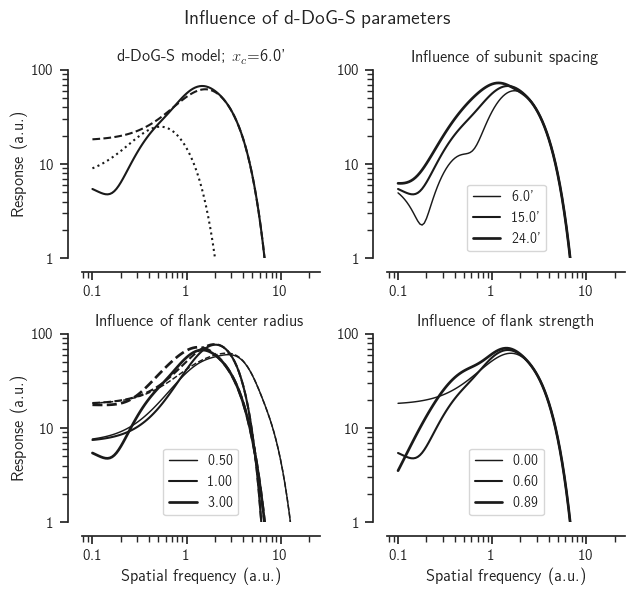

In [1862]:
# DOG params
ref_params_dog1 = [90, 0.1, 1.4, 3];
ref_params_dog2 = [0.4, 3, 1.4, 3]; # the center params (first two) are relative to dog1
ref_params_sep = [-np.inf, 0];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [-np.inf,1,0,0], ref_params_sep))
ref_params_dog2_only = np.hstack((np.hstack((np.multiply(ref_params_dog1[0:2], ref_params_dog2[0:2]), 
                                             ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 20, 100);

del_linewidth = True;

nrow, ncol = 2,2
# f, ax = plt.subplots(nrow, ncol, figsize=(nrow*8,ncol*6))
f, ax = plt.subplots(nrow, ncol, figsize=hf.set_size(tex_width, subplots=(nrow,ncol), extra_height=1.5));#figsize=(nrow*8,ncol*6))

### all log-log

# first, just a simple DoG
ax[0,0].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals), 'k-')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals), 'k--')
ax[0,0].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals), 'k:')
ax[0,0].set_title('d-DoG-S model; $x_c$=%.1f\'' % hf.arcmin_to_deg(ref_params_dog1[1], reverse=True))

# then, subunit spacing
vols = [-np.Inf,0,np.Inf]
for ii,v in enumerate(vols):
    prms_curr = np.copy(ref_params_all);
    prms_curr[-1] = v;
    
    # now, change the linewidth to be a fraction of the default
#     curr_lw = v/np.median(vols) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']

    smaller = hf.arcmin_to_deg(np.minimum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    larger = hf.arcmin_to_deg(np.maximum(ref_params_dog1_only[1], ref_params_dog2_only[1]), reverse=True)
    curr_space = smaller + hf.sigmoid(v)*larger
    
    ax[0,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.1f\'' % curr_space, linewidth=curr_lw)#, alpha=v)
    ax[0,1].legend(fontsize='small')
    #     ax[0,1].plot(vals, hf.DoGsach(*prms_curr, stim_sf=vals)[0], 'k:', linewidth=0.5+curr_lw) # add a bit extra width for the dotted lines!
ax[0,1].set_title('Influence of subunit spacing')

# then, rc2
rcs = [0.5, 1, 3]
for ii,r in enumerate(rcs):
    prms_curr = np.copy(ref_params_all);
    prms_curr[5] = r;
    alph = 1 - r/rcs[-1] + 0.1
    
    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.2f' % r, linewidth=curr_lw);#, alpha=alph)
    ax[1,0].legend(fontsize='small')
    
    prms_curr[2] = 0; # shut off the suround, and plot only the center...
    prms_curr[6] = 0; # shut off the suround, and plot only the center...
    ax[1,0].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k--', linewidth=curr_lw)
ax[1,0].set_title('Influence of flank center radius')

# then, flank strength (sigmoid input)
rss = [-np.Inf, 0.4, 2.14]
for ii,r in enumerate(rss):
    prms_curr = np.copy(ref_params_all);
    prms_curr[4] = r;
    alph = 1 - r/rss[-1] + 0.1

    # now, change the linewidth to be a fraction of the default
    curr_lw = (0.7+0.3*ii) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
#     curr_lw = np.sqrt(r/np.median(rss)) * rcParams['lines.linewidth'] if del_linewidth else rcParams['lines.linewidth']
    
    ax[1,1].plot(vals, hf.parker_hawken(prms_curr, stim_sf=vals), 'k-', label='%.2f' % hf.sigmoid(r), linewidth=curr_lw)#, alpha=alph)
    
    ax[1,1].legend(fontsize='small')
ax[1,1].set_title('Influence of flank strength')

for i,j in itertools.product(range(2),range(2)):
    ax[i,j].set_xscale('log')
    ax[i,j].set_yscale('log')
    ax[i,j].set_ylim([1, 100])
    if i == 1:
        xlbl = '(a.u.)' if normed else '(c/deg)'
        ax[i,j].set_xlabel('Spatial frequency %s' % xlbl)
    if j == 0:
        ylbl = '(a.u.)' if normed else '(spikes/s)'
        ax[i,j].set_ylabel('Response %s' % ylbl)
    ax[i,j].set_aspect('equal')

    for jj, axis in enumerate([ax[i,j].xaxis, ax[i,j].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                     
    
sns.despine(offset=10)
f.suptitle(r'Influence of d-DoG-S parameters')

f.tight_layout()

saveName = "/01_02_03d_ddogs_simulation_varXC.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()


# 1.3 Discussion plots, including LGN vs V1 comparison

In [1988]:
lgn_date, lgn_mod, lgn_joint = '220811', 1, 7
v1_date, v1_mod, v1_joint = '220811vE', 3, 10

thresh = 0;

lgn_suffix = '%s_%s_vT%02d_dvT%02d_jt%d' % ('LGN', lgn_date, thresh, thresh, lgn_joint)
v1_suffix = '%s_%s_vT%02d_dvT%02d_m%dj%d' % ('V1', v1_date, thresh, thresh, v1_mod, v1_joint)

lgn_jointList = hf.np_smart_load(base_dir + 'jointList_%s.npy' % lgn_suffix)
v1_jointList = hf.np_smart_load(base_dir + 'jointList_%s.npy' % v1_suffix)

In [1989]:
joints = [lgn_jointList, v1_jointList]
whichAreas = ['LGN', 'V1']

### First, trim the non-included cells from the jointList
for ii, jointList in enumerate(joints):
    # Get the keys as ints for easy indexing
    keysAsInts = np.array([int(x) for x in jointList.keys()])

    prevCells = len(jointList)
    critA = np.where([len(np.where(~np.isnan(jointList[x]['metrics']['dog_varExpl'][0,-1]))[0]) > 0 for x in sorted(jointList.keys())])[0]

    jointListTrim = {key: jointList[keysAsInts[key]] for key in critA}
    joints[ii] = jointListTrim

    remCells = len(joints[ii])

    nCut = prevCells-remCells

    print('We cut %d cells (%.2f%% of the original %d)' % (nCut, 100*nCut/prevCells, prevCells))

    # also get the keys as ints for easy indexing
    keysAsInts = np.array([int(x) for x in jointList.keys()])
    
### Then, let's also re-arrange into a pandas data frame
megas = [];

for jointList, whichArea in zip(joints, whichAreas):

    ohno = pd.DataFrame.from_dict(jointList) #, orient='index')

    meta = pd.json_normalize([ohno[x]['metadata'] for x in sorted(ohno.keys())])
    metr = pd.json_normalize([ohno[x]['metrics'] for x in sorted(ohno.keys())])
    modl = pd.json_normalize([ohno[x]['model'] for x in sorted(ohno.keys())])
    # supr = pd.json_normalize([ohno[x]['superpos'] for x in sorted(ohno.keys())])
    basc = pd.json_normalize([ohno[x]['basics'] for x in sorted(ohno.keys())])

    mega = pd.concat((meta, metr, modl, basc), axis=1);
    
    # First, classify as simple or complex [FOR USE WITH V1]
    simple = mega['f1f0_ratio'] > 1
    msk = np.copy(simple)
    simple[~msk] = 'complex'
    simple[msk] = 'simple'
    mega['simple'] = simple
    # Then, if LGN, group all of the others together, label new type as triType
    if whichArea == 'LGN':
        cellTypes = mega['cellType'];
        non_mp = np.logical_and(~(cellTypes=='parvo'), ~(cellTypes=='magno'))
        cellTypes[non_mp] = 'other'
        mega['triType'] = cellTypes;
        
    megas.append(mega);
    
# Finally, unpack the trimmed dataframes
lgn_jointList, v1_jointList = megas

We cut 7 cells (6.09% of the original 115)
We cut 26 cells (19.12% of the original 136)


/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##### Establish the colors, as used in the other, area-specifc plots

In [2733]:
# get color scheme
area_colors = [];
toGroups = ['triType', 'simple']; # corresponding to LGN, V1

for mega, whichArea, toGroup in zip(megas, whichAreas, toGroups):

    cnt = 0;
    grp_names = [];
    for nm, group in mega.groupby(toGroup, sort=False):
        cnt += 1;
        grp_names.append(nm)

    # colors = cm.viridis(np.linspace(0.15, 0.95, cnt))
    if whichArea=='V1':
#         colors = sns.color_palette('husl', n_colors=cnt-1)
        colors = sns.color_palette('viridis', n_colors=cnt-1)
        colors.append((0,0,0)); # add black!
    else:
        # why adding extra colors?
        # well, the 3rd color looks like the first in viridis
        colors = sns.color_palette('colorblind', n_colors=cnt+2)
        # so we'll add extras and swap with the desirable one
        colors[2] = colors[4]
        
    area_colors.append(colors)

LGN colors (we'll use the first three)

In [2738]:
area_colors[0]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

V1 colors

In [2739]:
area_colors[1]

[(0.127568, 0.566949, 0.550556), (0, 0, 0)]

### CDF of characteristic frequency slope
We'll split by type (m, p, v1:simple, v1:complex)

In [ ]:
lgn_jointList.groupby()

Layers, per JK on 22.08.31

In [2473]:
v1_layers_220901 = ['', '', '', '', '', '', '', # altExp...
                    'wm', '5', '4Cb', '4Cb', '2/3', '2/3',
                    '4Ca', '4Ca', '4B', '4Ca', '4Ca', '4B', '4B',
                    '4B', '4B', '1', '4B', '4A', '2/3', '4B', '4B', 
                    '4B', '4Cb', '2/3', '6', '6', '2/3', '4Cb', '4Cb', '4Cb',
                    '4Ca', '6', '4B', '4B', '4Ca', '4B', 
                    'V2', 'V2', '5', '5', 'wm', 'wm', 'V2', 'V2',  
                    'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 
                    'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', # end of V1
                    '', '', '', '', '', '', '', '', '', '',
                    '', '', '', '', '', '', '', '', 
                    '', '', '', '', '', '', '', '', 
                    '', '', '', '', '', '', '', '', 
                    '', '', '', '', '', '', '', '', 
                   ];

In [2474]:
v1_jointList['layers'] = v1_layers_220901

In [2475]:
for (i,x),layer in zip(enumerate(v1_jointList['expName']), v1_jointList['layers']):
    print('%d: %s --> %s' % (i,x,layer))

0: m670l14 --> 
1: m670l16 --> 
2: m670l22 --> 
3: m670l38 --> 
4: m670l41 --> 
5: m670l46 --> 
6: m671r5 --> 
7: m676l01 --> wm
8: m676p03l06_180_210_c018 --> 5
9: m676p03l06_180_210_c030 --> 4Cb
10: m676p03l06_180_210_c036 --> 4Cb
11: m676p03l07_280_310_c034 --> 2/3
12: m676p03l07_280_310_c050 --> 2/3
13: m676p03l13_282_311_c004 --> 4Ca
14: m676p03l13_282_311_c043 --> 4Ca
15: m676p03l15 --> 4B
16: m678p05l06_160_189_c015 --> 4Ca
17: m678p05l06_160_189_c020 --> 4Ca
18: m678p05l06_160_189_c071 --> 4B
19: m678p05l07_181_210_c004 --> 4B
20: m678p05l07_181_210_c023 --> 4B
21: m678p05l07_181_210_c029 --> 4B
22: m678p06l12_021_050_c007 --> 1
23: m678p06l15_200_229_c014 --> 4B
24: m678p06l15_200_229_c029 --> 4A
25: m678p06l15_200_229_c033 --> 2/3
26: m678p06l16_176_205_c023 --> 4B
27: m678p06l16_176_205_c043 --> 4B
28: m678p06l16_176_205_c069 --> 4B
29: m678p06l17_013_042_c033 --> 4Cb
30: m678p07r03_280_309_c040 --> 2/3
31: m681p02r02_015_044_c006 --> 6
32: m681p02r02_015_044_c023 --> 6
33: 

In [2481]:
def group_layer(x):
    if x=='1' or x=='2/3' or x=='4A' or x=='4B':
        return -1; # supragranular
    elif x=='4Ca' or x=='4Cb':
        return 0; # input
    elif x=='5' or x=='6':
        return 1; # infragranular
    elif x=='V2':
        return 2; # for V2...
    else:
        return -99; # invalid...
grps = [group_layer(x) for x in v1_jointList['layers']]
v1_jointList['layer_groups'] = grps;

In [2513]:
toGroups_alt = ['triType', 'layer_groups']

# new colors, too...
n_layers = len(v1_jointList['layer_groups'].unique())
layer_colors =  sns.color_palette('seismic', n_colors=n_layers-1)
layer_colors.append((0,0,0)); # add black!
area_colors_alt = [area_colors[0], layer_colors]

In [2545]:
np.sum(v1_jointList.layer_groups == 2)

21

In [2549]:
v1_jointList = v1_jointList[v1_jointList.layer_groups != 2]
v1_jointList = v1_jointList.reset_index();
# and reconstitute the megas array after this correction
megas = [lgn_jointList, v1_jointList]

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:33: VisibleDeprecationW

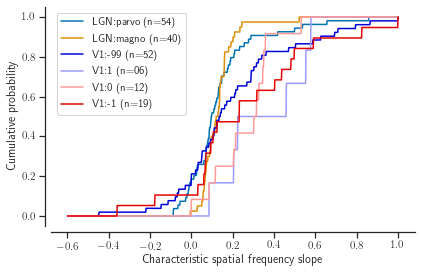

In [2550]:
to_center = False;
with_legend = True;
with_other = False;
smaller_size = False;

skip_v2 = True;

to_comp = [];
all_in_area = [];
comp_names = [];

if to_center:
    bins = np.linspace(-1,1,1000); # what bins for the CDF? we know slope is bounded between [-1,1]
else:
    bins = np.linspace(-0.6,1,1000); # what bins for the CDF? we know slope is bounded between [-1,1]

wid = tex_width/2 if smaller_size else tex_width
plt.figure(figsize=hf.set_size(wid));

for area,mega,grp_name,clrs in zip(whichAreas, megas, toGroups_alt, area_colors_alt):

    curr_area = [];
    
    for (nm,grp),clr in zip(mega.groupby(grp_name, sort=False), clrs):

        if nm=='other' and not with_other:
            curr_area.append(-grp['dog_mod_slope']); # but still add the 'other' to the LGN population for comparison with V1
            continue;
        if skip_v2 and nm==2:
            continue;
        
        vals = -grp['dog_mod_slope'] # negate, because the slopes are for xc, not fc
        counts,edges = np.histogram(vals, bins = bins, normed = True)
        bin_width = edges[1] - edges[0]
        cdf = np.cumsum(counts)*bin_width

        plt.plot(bins[1:], cdf, color=clr, label='%s:%s (n=%02d)' % (area,nm, len(vals)))
        
        to_comp.append(vals);
        curr_area.append(vals);
        comp_names.append(nm);
    
    all_in_area.append(np.hstack(curr_area));
    
# aesthetic stuff..
plt.ylabel('Cumulative probability');
plt.xlabel('Characteristic spatial frequency slope');
if with_legend:
    if smaller_size:
        plt.legend(fontsize='xx-small');
    else:
        plt.legend();
sns.despine(offset=6)

saveName = "/01_03_slopeLayer_cdf%s%s%s%s%s.pdf" % ('_full' if to_center else '', '_lgnd' if with_legend else '', '_other' if with_other else '', '_small' if smaller_size else '', '_noV2' if skip_v2 else '')
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

Also, what is the breakdown of simple/complex per layer group:

In [2551]:
v1_jointList.groupby(['layers', 'simple']).size()

layers  simple 
        complex    21
        simple     28
1       complex     1
2/3     complex     5
4A      complex     1
4B      complex     5
        simple      7
4Ca     complex     2
        simple      4
4Cb     complex     1
        simple      5
5       complex     3
6       complex     3
wm      complex     2
        simple      1
dtype: int64

In [2552]:
v1_jointList.groupby(['layer_groups', 'simple']).size()

layer_groups  simple 
-99           complex    23
              simple     29
-1            complex    12
              simple      7
 0            complex     3
              simple      9
 1            complex     6
dtype: int64

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationW

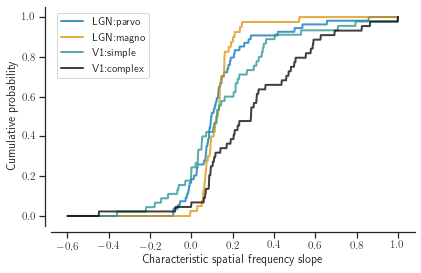

In [2707]:
to_center = False;
with_legend = True;
with_other = False;
smaller_size = False;

to_comp = [];
all_in_area = [];
comp_names = [];

if to_center:
    bins = np.linspace(-1,1,1000); # what bins for the CDF? we know slope is bounded between [-1,1]
else:
    bins = np.linspace(-0.6,1,1000); # what bins for the CDF? we know slope is bounded between [-1,1]

wid = tex_width/2 if smaller_size else tex_width
plt.figure(figsize=hf.set_size(wid));

for area,mega,grp_name,clrs in zip(whichAreas, megas, toGroups, area_colors):

    curr_area = [];
    
    for (nm,grp),clr in zip(mega.groupby(grp_name, sort=False), clrs):

        if nm=='other' and not with_other:
            curr_area.append(-grp['dog_mod_slope']); # but still add the 'other' to the LGN population for comparison with V1
            continue;
        
        vals = -grp['dog_mod_slope'] # negate, because the slopes are for xc, not fc
        counts,edges = np.histogram(vals, bins = bins, normed = True)
        bin_width = edges[1] - edges[0]
        cdf = np.cumsum(counts)*bin_width

        plt.plot(bins[1:], cdf, color=clr, label='%s:%s' % (area,nm), linewidth=2, alpha=0.75)
        
        to_comp.append(vals);
        curr_area.append(vals);
        comp_names.append(nm);
    
    all_in_area.append(np.hstack(curr_area));
    
# aesthetic stuff..
plt.ylabel('Cumulative probability');
plt.xlabel('Characteristic spatial frequency slope');
if with_legend:
    if smaller_size:
        plt.legend(fontsize='xx-small');
    else:
        plt.legend();
sns.despine(offset=6)

saveName = "/01_03_slope_cdf%s%s%s%s.pdf" % ('_full' if to_center else '', '_lgnd' if with_legend else '', '_other' if with_other else '', '_small' if smaller_size else '')
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

In [2134]:
comp_names

['parvo', 'magno', 'simple', 'complex']

Unequal variances in the different distributions, per Levene's test. Thus, we cannot use the F-test/ANOVA

In [2152]:
ss.levene(*to_comp)

LeveneResult(statistic=9.48643814131201, pvalue=6.891155203599318e-06)

Kruskal test says that population medians ARE different (p=0.033<0.05)

In [2153]:
ss.kruskal(*to_comp)

KruskalResult(statistic=8.751093208216545, pvalue=0.032789995314239435)

Now, comparing the subpopulations to one another (I believe this isn't kosher...):

In [2130]:
itertools.combinations(to_comp, 2)

In [2142]:
for a,b in list(itertools.combinations(range(len(to_comp)), 2)):
    
    pval = ss.mannwhitneyu(to_comp[a], to_comp[b], alternative='two-sided').pvalue;
    print('%s%s vs. %s: %.2e' % ('* ' if pval<0.05 else '', comp_names[a], comp_names[b], pval))

parvo vs. magno: 4.20e-01
parvo vs. simple: 7.64e-01
* parvo vs. complex: 8.19e-03
magno vs. simple: 8.39e-01
* magno vs. complex: 1.36e-02
simple vs. complex: 9.81e-02


The below comparison says that the two areas (LGN and V1) have different medians

In [2154]:
ss.mannwhitneyu(*all_in_area)

/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/scipy/stats/stats.py:7002: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)


MannwhitneyuResult(statistic=4995.0, pvalue=0.021257616932972744)

Cannot justify using F-test for comparing across the groups, but showing it anyway

In [2155]:
ss.f_oneway(*to_comp)

F_onewayResult(statistic=2.195814972802081, pvalue=0.08976472530351984)

### Tuning shifts as a contrast gain mechanism

For the discussion, highlight that the other way of viewing SF tuning which changes with contrast is that different SFs will have different RVC shapes (i.e. not just vertically scaled, but actually shifted).

Per TM, show one LGN and one V1 example, showing three SFs for each (low/peak/high)

In [2697]:
autoreload.reload(psf);

/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/plot_sf_figs.py:283: DeprecationWarning: invalid escape sequence \%
  ax[i,j].plot(sfs_plot[plt_resp>minToPlot], plt_resp[plt_resp>minToPlot], color=col, clip_on=True, label='%s\%%' % (str(int(100*np.round(curr_con, 2)))));


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);


phaseAdvanceFitsHPC_220531


/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1465: UserWarning: this condition is not valid
  warnings.warn('this condition is not valid');
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:5001: RuntimeWarning: Mean of empty slice
  rateSfMix = numpy.nanmean(allSfMix, -1);
/arc/2.2/p1/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/helper_fcns.py:1167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  spike_times = np.array([trial_inf['spikeTimes'][x] for x in all_trs]);
/users/plevy/miniconda3/envs/pytorch-lcv/lib/python3.6/site-packages/numpy/lib/na

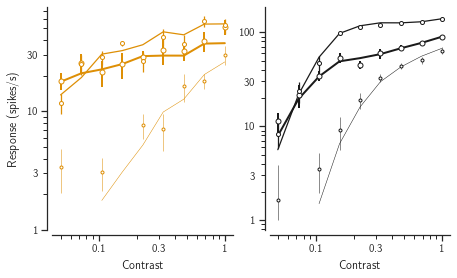

In [2699]:
common_axes = False;
f,yax=plt.subplots(1,2, figsize=hf.set_size(tex_width), sharex=common_axes, sharey=common_axes)

mono = False; # all black, or apply class-specific color?

joint = 7; # joint=2 means surround radius is fixed across contrast; 7 is slope model; 0 is sep. fits
date_lgn = '220810vEs'
date_v1 = '220811vEs'
phDate = '220718'; # only applies for V1 (LGN passed directly)
rvcDate = '220718'
rvcDate_altExp = '220609';

despine=5

# incl_legend=True
# subplot_title=True
incl_legend=False
subplot_title=False

# LGN - a magnos [LGN index 1, for color]
lgn_color = 'k' if mono else area_colors[0][1] 
psf.plot_rvcs(yax, np.nan, 0, 66, 'LGN/', descrBase='descrFitsHPC_%s' % date_lgn, subset_sfs=[2,5,8], descrMod=1, joint=7, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1, color=lgn_color)
# psf.plot_rvcs(yax, np.nan, 0, 66, 'LGN/', descrBase='descrFitsHPC_%s' % date_lgn, subset_sfs=[4,6,8], descrMod=1, joint=7, rvcAdj=1, rvcBase='rvcFitsHPC_220531', phBase='phaseAdvanceFitsHPC_220531', incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1, color=lgn_color)
# V1 - complex [V1 index 1, for color]
v1_color = 'k' if mono else area_colors[1][1]
# psf.plot_rvcs(yax, np.nan, 1, 50, 'V1/', descrBase='descrFitsHPC_%s' % date_v1, subset_sfs=[5,7,9], descrMod=3, joint=10, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1, color=v1_color)
# psf.plot_rvcs(yax, np.nan, 1, 50, 'V1/', descrBase='descrFitsHPC_%s' % date_v1, subset_sfs=[4,6,8], descrMod=3, joint=10, rvcAdj=1, rvcBase='rvcFitsHPC_%s' % rvcDate, phBase='phaseAdvanceFitsHPC_%s' % phDate, incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1)
psf.plot_rvcs(yax, np.nan, 1, 4, 'altExp/', descrBase='descrFitsHPC_%s' % date_v1, subset_sfs=[4,6,8], descrMod=3, joint=10, rvcAdj=0, rvcBase='rvcFitsHPC_%s' % rvcDate_altExp, incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1)
# psf.plot_rvcs(yax, np.nan, 1, 4, 'altExp/', descrBase='descrFitsHPC_%s' % date_v1, subset_sfs=[3,5,7], descrMod=3, joint=10, rvcAdj=0, rvcBase='rvcFitsHPC_%s' % rvcDate_altExp, incl_legend=incl_legend, subplot_title=subplot_title, despine_offset=despine, nrow=1)

if incl_legend or subplot_title:
    f.tight_layout(w_pad=0.5);
else:
    f.tight_layout(w_pad=0.5);
#     f.subplots_adjust(wspace=-0.025)

saveName = "/01_03_rvcs%s%s%s%s.pdf" % ('_lgnd' if incl_legend else '', '_ttl' if subplot_title else '', '_common' if common_axes else '', '_mono' if mono else '')
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(f, bbox_inches='tight') # only one figure here...
pdfSv.close()

#### How many unique experiments
i.e. we need to know how many monkeys were used for the data

In [2396]:
for area,mega in zip(whichAreas, megas):

    inds = mega['mInd'].unique();
    print('\n%s: %02d monkeys' % (area, len(inds)))
    print(inds)


LGN: 06 monkeys
[675 680 682 595 597 599]

V1: 07 monkeys
[670 671 676 678 681 684 685]


Sex by animal:


Sach:  
m595 - female, nemastrina  
m597 - male, cyno  
m599 - male, cyno  

Ours:  
m670 - male, rhesus  
m671 - male, rhesus  
m675 - male, nemastrina  
m676 - male, cyno  
m678 - male, cyno  
m680 - male, cyno  
m681 - male, cyno  
m682 - male, rhesus  
m684 - male, rhesus  
m685 - male, cyno   
